In [1]:
import time
import numpy as np
import pandas as pd

# from scipy import sparse
from scipy.stats.mstats import gmean
from datetime import datetime
# from sklearn import preprocessing
# from scipy.stats import skew, boxcox,boxcox_normmax
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from bayes_opt import BayesianOptimization
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import xgboost as xgb

seed = 1234

# Load Data

In [2]:
train_y = np.ravel(pd.read_csv('../input/' + 'labels_BrandenMurray.csv'))

names = ['low_0','medium_0','high_0',
        'low_1','medium_1','high_1',
        'low_2','medium_2','high_2',
        'low_3','medium_3','high_3',
        'low_4','medium_4','high_4',
        'low_5','medium_5','high_5',
        'low_6','medium_6','high_6',
        'low_7','medium_7','high_7',
        'low_8','medium_8','high_8',
        'low_9','medium_9','high_9']

data_path = "../2nd/"
total_col = 0

In [3]:
# RFC 1st level 
file_train      = 'train_blend_RFC_gini_BM_MB_add03052240_2017-03-10-22-02' + '.csv'
file_test_mean  = 'test_blend_RFC_gini_mean_BM_MB_add03052240_2017-03-10-22-02' + '.csv'
file_test_gmean = 'test_blend_RFC_gini_gmean_BM_MB_add03052240_2017-03-10-22-02' + '.csv'

train_rfc_gini      = pd.read_csv(data_path + file_train,      header = None)
test_rfc_gini_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_rfc_gini_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_rfc_gini.shape[1]
total_col += n_column

train_rfc_gini.columns      = ['rfc_gini_' + x for x in names[:n_column]]
test_rfc_gini_mean.columns  = ['rfc_gini_' + x for x in names[:n_column]]
test_rfc_gini_gmean.columns = ['rfc_gini_' + x for x in names[:n_column]]

file_train      = 'train_blend_RFC_entropy_BM_MB_add03052240_2017-03-10-21-10' + '.csv'
file_test_mean  = 'test_blend_RFC_entropy_mean_BM_MB_add03052240_2017-03-10-21-10' + '.csv'
file_test_gmean = 'test_blend_RFC_entropy_gmean_BM_MB_add03052240_2017-03-10-21-10' + '.csv'

train_rfc_entropy      = pd.read_csv(data_path + file_train,      header = None)
test_rfc_entropy_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_rfc_entropy_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_rfc_entropy.shape[1]
total_col += n_column

train_rfc_entropy.columns      = ['rfc_entropy_' + x for x in names[:n_column]]
test_rfc_entropy_mean.columns  = ['rfc_entropy_' + x for x in names[:n_column]]
test_rfc_entropy_gmean.columns = ['rfc_entropy_' + x for x in names[:n_column]]



print 'train_rfc_gini: {}\t test_rfc_gini_mean:{}\t test_rfc_gini_gmean:{}'.\
        format(train_rfc_gini.shape,test_rfc_gini_mean.shape,test_rfc_gini_gmean.shape)
print '\ntrain_rfc_entropy: {}\t test_rfc_entropy_mean:{}\t test_rfc_entropy_gmean:{}'.\
        format(train_rfc_entropy.shape,test_rfc_entropy_mean.shape,test_rfc_entropy_gmean.shape)

    
print '\ntrain_rfc_gini'
print train_rfc_gini.iloc[:5,:3]
print '\ntrain_rfc_entropy'
print train_rfc_entropy.iloc[:5,:3]



train_rfc_gini: (49352, 3)	 test_rfc_gini_mean:(74659, 3)	 test_rfc_gini_gmean:(74659, 3)

train_rfc_entropy: (49352, 3)	 test_rfc_entropy_mean:(74659, 3)	 test_rfc_entropy_gmean:(74659, 3)

train_rfc_gini
   rfc_gini_low_0  rfc_gini_medium_0  rfc_gini_high_0
0        0.543090           0.387824         0.069086
1        0.431967           0.501843         0.066191
2        0.796826           0.180090         0.023085
3        0.671667           0.274519         0.053815
4        0.931788           0.064494         0.003718

train_rfc_entropy
   rfc_entropy_low_0  rfc_entropy_medium_0  rfc_entropy_high_0
0           0.542659              0.393322            0.064019
1           0.464249              0.477816            0.057935
2           0.799674              0.184329            0.015997
3           0.686509              0.278618            0.034872
4           0.966726              0.029282            0.003992


In [4]:
# RFC 1st level 0322
file_train      = 'train_blend_RFC_gini_BM_0322_2017-03-22-17-12' + '.csv'
file_test_mean  = 'test_blend_RFC_gini_mean_BM_0322_2017-03-22-17-12' + '.csv'
file_test_gmean = 'test_blend_RFC_gini_gmean_BM_0322_2017-03-22-17-12' + '.csv'

train_rfc_gini_0322      = pd.read_csv(data_path + file_train,      header = None)
test_rfc_gini_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_rfc_gini_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_rfc_gini_0322.shape[1]
total_col += n_column

train_rfc_gini_0322.columns      = ['rfc_gini_0322_' + x for x in names[:n_column]]
test_rfc_gini_mean_0322.columns  = ['rfc_gini_0322_' + x for x in names[:n_column]]
test_rfc_gini_gmean_0322.columns = ['rfc_gini_0322_' + x for x in names[:n_column]]


file_train      = 'train_blend_RFC_entropy_BM_0322_2017-03-22-16-02' + '.csv'
file_test_mean  = 'test_blend_RFC_entropy_mean_BM_0322_2017-03-22-16-02' + '.csv'
file_test_gmean = 'test_blend_RFC_entropy_gmean_BM_0322_2017-03-22-16-02' + '.csv'

train_rfc_entropy_0322      = pd.read_csv(data_path + file_train,      header = None)
test_rfc_entropy_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_rfc_entropy_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_rfc_entropy_0322.shape[1]
total_col += n_column

train_rfc_entropy_0322.columns      = ['rfc_entropy_0322_' + x for x in names[:n_column]]
test_rfc_entropy_mean_0322.columns  = ['rfc_entropy_0322_' + x for x in names[:n_column]]
test_rfc_entropy_gmean_0322.columns = ['rfc_entropy_0322_' + x for x in names[:n_column]]


print '\ntrain_rfc_entropy: {}\t test_rfc_entropy_mean:{}\t test_rfc_entropy_gmean:{}'.\
        format(train_rfc_gini_0322.shape,test_rfc_gini_mean_0322.shape,test_rfc_gini_gmean_0322.shape)
print '\ntrain_rfc_entropy: {}\t test_rfc_entropy_mean:{}\t test_rfc_entropy_gmean:{}'.\
        format(train_rfc_entropy_0322.shape,test_rfc_entropy_mean_0322.shape,test_rfc_entropy_gmean_0322.shape)
    
    
print '\ntrain_rfc_gini_0322'
print train_rfc_gini_0322.iloc[:5,:3]
print '\ntrain_rfc_entropy_0322'
print train_rfc_entropy_0322.iloc[:5,:3]


train_rfc_entropy: (49352, 3)	 test_rfc_entropy_mean:(74659, 3)	 test_rfc_entropy_gmean:(74659, 3)

train_rfc_entropy: (49352, 3)	 test_rfc_entropy_mean:(74659, 3)	 test_rfc_entropy_gmean:(74659, 3)

train_rfc_gini_0322
   rfc_gini_0322_low_0  rfc_gini_0322_medium_0  rfc_gini_0322_high_0
0             0.529595                0.404298              0.066107
1             0.439197                0.489992              0.070812
2             0.792970                0.189331              0.017699
3             0.675457                0.276198              0.048345
4             0.951710                0.043953              0.004337

train_rfc_entropy_0322
   rfc_entropy_0322_low_0  rfc_entropy_0322_medium_0  rfc_entropy_0322_high_0
0                0.551613                   0.396561                 0.051826
1                0.430922                   0.511564                 0.057514
2                0.788894                   0.201162                 0.009943
3                0.675501    

In [5]:
# LR 1st level
file_train = 'train_blend_LR_BM_2017-03-09-02-38' + '.csv'
file_test_mean = 'test_blend_LR_mean_BM_2017-03-09-02-38' + '.csv'
file_test_gmean = 'test_blend_LR_gmean_BM_2017-03-09-02-38' + '.csv'

train_LR      = pd.read_csv(data_path + file_train, header = None)
test_LR_mean  = pd.read_csv(data_path + file_test_mean, header = None)
test_LR_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_LR.shape[1]
total_col += n_column

train_LR.columns      = ['LR_' + x for x in names[:n_column]]
test_LR_mean.columns  = ['LR_' + x for x in names[:n_column]]
test_LR_gmean.columns = ['LR_' + x for x in names[:n_column]]

print 'train_LR: {}\t test_LR_mean:{}\t test_LR_gmean:{}'.\
        format(train_LR.shape,test_LR_mean.shape,test_LR_gmean.shape)

print '\ntrain_LR'
print train_LR.iloc[:5,:3]




train_LR: (49352, 21)	 test_LR_mean:(74659, 21)	 test_LR_gmean:(74659, 21)

train_LR
   LR_low_0  LR_medium_0  LR_high_0
0  0.422874     0.486259   0.090867
1  0.321009     0.599539   0.079452
2  0.655066     0.315023   0.029912
3  0.711200     0.252680   0.036120
4  0.902499     0.090717   0.006784


In [6]:
# LR 1st level 0322
file_train = 'train_blend_LR_BM_0322_2017-03-22-23-38' + '.csv'
file_test_mean = 'test_blend_LR_mean_BM_0322_2017-03-22-23-38' + '.csv'
file_test_gmean = 'test_blend_LR_gmean_BM_0322_2017-03-22-23-38' + '.csv'

train_LR_0322      = pd.read_csv(data_path + file_train, header = None)
test_LR_mean_0322  = pd.read_csv(data_path + file_test_mean, header = None)
test_LR_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_LR_0322.shape[1]
total_col += n_column

train_LR_0322.columns      = ['LR_0322_' + x for x in names[:n_column]]
test_LR_mean_0322.columns  = ['LR_0322_' + x for x in names[:n_column]]
test_LR_gmean_0322.columns = ['LR_0322_' + x for x in names[:n_column]]

print 'train_LR_0322: {}\t test_LR_mean_0322:{}\t test_LR_gmean_0322:{}'.\
        format(train_LR_0322.shape,test_LR_mean_0322.shape,test_LR_gmean_0322.shape)

print '\ntrain_LR_0322'
print train_LR_0322.iloc[:5,:3]

train_LR_0322: (49352, 21)	 test_LR_mean_0322:(74659, 21)	 test_LR_gmean_0322:(74659, 21)

train_LR_0322
   LR_0322_low_0  LR_0322_medium_0  LR_0322_high_0
0       0.406942          0.518465        0.074592
1       0.333177          0.579416        0.087407
2       0.636033          0.314385        0.049582
3       0.647588          0.313159        0.039253
4       0.899655          0.093021        0.007324


In [7]:
# ET 1st level
file_train      = 'train_blend_ET_gini_BM_2017-03-10-09-42' + '.csv'
file_test_mean  = 'test_blend_ET_gini_mean_BM_2017-03-10-09-42' + '.csv'
file_test_gmean = 'test_blend_ET_gini_gmean_BM_2017-03-10-09-42' + '.csv'

train_ET_gini      = pd.read_csv(data_path + file_train,      header = None)
test_ET_gini_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_ET_gini_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_ET_gini.shape[1]
total_col += n_column

train_ET_gini.columns      = ['ET_gini_' + x for x in names[:n_column]]
test_ET_gini_mean.columns  = ['ET_gini_' + x for x in names[:n_column]]
test_ET_gini_gmean.columns = ['ET_gini_' + x for x in names[:n_column]]

file_train      = 'train_blend_ET_entropy_BM_2017-03-09-20-44' + '.csv'
file_test_mean  = 'test_blend_ET_entropy_mean_BM_2017-03-09-20-44' + '.csv'
file_test_gmean = 'test_blend_ET_entropy_gmean_BM_2017-03-09-20-44' + '.csv'

train_ET_entropy      = pd.read_csv(data_path + file_train,      header = None)
test_ET_entropy_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_ET_entropy_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_ET_entropy.shape[1]
total_col += n_column

train_ET_entropy.columns      = ['ET_entropy_' + x for x in names[:n_column]]
test_ET_entropy_mean.columns  = ['ET_entropy_' + x for x in names[:n_column]]
test_ET_entropy_gmean.columns = ['ET_entropy_' + x for x in names[:n_column]]

print 'train_ET_gini: {}\t test_ET_gini_mean:{}\t test_ET_gini_gmean:{}'.\
        format(train_ET_gini.shape,test_ET_gini_mean.shape,test_ET_gini_gmean.shape)
print '\ntrain_ET_entropy: {}\t test_ET_entropy_mean:{}\t test_ET_entropy_gmean:{}'.\
        format(train_ET_entropy.shape,test_ET_entropy_mean.shape,test_ET_entropy_gmean.shape)
    
    
print '\ntrain_ET_gini'
print train_ET_gini.iloc[:5,:3]
print '\ntrain_ET_entropy'
print train_ET_entropy.iloc[:5,:3]






train_ET_gini: (49352, 3)	 test_ET_gini_mean:(74659, 3)	 test_ET_gini_gmean:(74659, 3)

train_ET_entropy: (49352, 3)	 test_ET_entropy_mean:(74659, 3)	 test_ET_entropy_gmean:(74659, 3)

train_ET_gini
   ET_gini_low_0  ET_gini_medium_0  ET_gini_high_0
0       0.491197          0.458682        0.050121
1       0.350925          0.570142        0.078934
2       0.834381          0.154016        0.011603
3       0.721964          0.239236        0.038800
4       0.950719          0.042887        0.006394

train_ET_entropy
   ET_entropy_low_0  ET_entropy_medium_0  ET_entropy_high_0
0          0.520529             0.431357           0.048114
1          0.377125             0.551815           0.071060
2          0.799234             0.188755           0.012011
3          0.716421             0.248984           0.034595
4          0.925534             0.066681           0.007785


In [8]:
# ET 1st level 0322
file_train      = 'train_blend_ET_gini_BM_0322_2017-03-23-16-04' + '.csv'
file_test_mean  = 'test_blend_ET_gini_mean_BM_0322_2017-03-23-16-04' + '.csv'
file_test_gmean = 'test_blend_ET_gini_gmean_BM_0322_2017-03-23-16-04' + '.csv'

train_ET_gini_0322      = pd.read_csv(data_path + file_train,      header = None)
test_ET_gini_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_ET_gini_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_ET_gini_0322.shape[1]
total_col += n_column

train_ET_gini_0322.columns      = ['ET_gini_0322_' + x for x in names[:n_column]]
test_ET_gini_mean_0322.columns  = ['ET_gini_0322_' + x for x in names[:n_column]]
test_ET_gini_gmean_0322.columns = ['ET_gini_0322_' + x for x in names[:n_column]]

file_train      = 'train_blend_ET_entropy_BM_0322_2017-03-23-13-40' + '.csv'
file_test_mean  = 'test_blend_ET_entropy_mean_BM_0322_2017-03-23-13-40' + '.csv'
file_test_gmean = 'test_blend_ET_entropy_gmean_BM_0322_2017-03-23-13-40' + '.csv'

train_ET_entropy_0322      = pd.read_csv(data_path + file_train,      header = None)
test_ET_entropy_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_ET_entropy_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_ET_entropy_0322.shape[1]
total_col += n_column

train_ET_entropy_0322.columns      = ['ET_entropy_0322_' + x for x in names[:n_column]]
test_ET_entropy_mean_0322.columns  = ['ET_entropy_0322_' + x for x in names[:n_column]]
test_ET_entropy_gmean_0322.columns = ['ET_entropy_0322_' + x for x in names[:n_column]]

print 'train_ET_gini_0322: {}\t test_ET_gini_mean_0322:{}\t test_ET_gini_gmean_0322:{}'.\
        format(train_ET_gini_0322.shape,test_ET_gini_mean_0322.shape,test_ET_gini_gmean_0322.shape)
print '\ntrain_ET_entropy_0322: {}\t test_ET_entropy_mean_0322:{}\t test_ET_entropy_gmean_0322:{}'.\
        format(train_ET_entropy_0322.shape,test_ET_entropy_mean_0322.shape,test_ET_entropy_gmean_0322.shape)
    
    
print '\ntrain_ET_gini_0322'
print train_ET_gini_0322.iloc[:5,:3]
print '\ntrain_ET_entropy_0322'
print train_ET_entropy_0322.iloc[:5,:3]

train_ET_gini_0322: (49352, 3)	 test_ET_gini_mean_0322:(74659, 3)	 test_ET_gini_gmean_0322:(74659, 3)

train_ET_entropy_0322: (49352, 3)	 test_ET_entropy_mean_0322:(74659, 3)	 test_ET_entropy_gmean_0322:(74659, 3)

train_ET_gini_0322
   ET_gini_0322_low_0  ET_gini_0322_medium_0  ET_gini_0322_high_0
0            0.490512               0.448808             0.060680
1            0.327548               0.587699             0.084753
2            0.836561               0.149571             0.013868
3            0.699839               0.255539             0.044622
4            0.950047               0.044878             0.005074

train_ET_entropy_0322
   ET_entropy_0322_low_0  ET_entropy_0322_medium_0  ET_entropy_0322_high_0
0               0.530947                  0.423271                0.045782
1               0.342346                  0.574514                0.083140
2               0.817611                  0.172923                0.009466
3               0.709965                  0.264

In [9]:
# KNN 1st level
file_train      = 'train_blend_KNN_uniform_BM_MB_add03052240_2017-03-11-18-31' + '.csv'
file_test_mean  = 'test_blend_KNN_uniform_mean_BM_MB_add03052240_2017-03-11-18-31' + '.csv'
file_test_gmean = 'test_blend_KNN_uniform_gmean_BM_MB_add03052240_2017-03-11-18-31' + '.csv'

train_KNN_uniform      = pd.read_csv(data_path + file_train,      header = None)
test_KNN_uniform_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_KNN_uniform_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_KNN_uniform.shape[1]
total_col += n_column

train_KNN_uniform.columns      = ['KNN_uniform_' + x for x in names[:n_column]]
test_KNN_uniform_mean.columns  = ['KNN_uniform_' + x for x in names[:n_column]]
test_KNN_uniform_gmean.columns = ['KNN_uniform_' + x for x in names[:n_column]]

file_train      = 'train_blend_KNN_distance_BM_MB_add_2017-03-11-21-51' + '.csv'
file_test_mean  = 'test_blend_KNN_distance_mean_BM_MB_add_2017-03-11-21-51' + '.csv'
file_test_gmean = 'test_blend_KNN_distance_gmean_BM_MB_add_2017-03-11-21-51' + '.csv'

train_KNN_distance      = pd.read_csv(data_path + file_train,      header = None)
test_KNN_distance_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_KNN_distance_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_KNN_distance.shape[1]
total_col += n_column

train_KNN_distance.columns      = ['KNN_distance_' + x for x in names[:n_column]]
test_KNN_distance_mean.columns  = ['KNN_distance_' + x for x in names[:n_column]]
test_KNN_distance_gmean.columns = ['KNN_distance_' + x for x in names[:n_column]]

print 'train_KNN_uniform: {}\t test_KNN_uniform_mean:{}\t test_KNN_uniform_gmean:{}'.\
        format(train_KNN_uniform.shape,test_KNN_uniform_mean.shape,test_KNN_uniform_gmean.shape)
print '\ntrain_KNN_distance: {}\t test_KNN_distance_mean:{}\t test_KNN_distance_gmean:{}'.\
        format(train_KNN_distance.shape,test_KNN_distance_mean.shape,test_KNN_distance_gmean.shape)
    
print '\ntrain_KNN_uniform'
print train_KNN_uniform.iloc[:5,:3]
print '\ntrain_KNN_distance'
print train_KNN_distance.iloc[:5,:3]

train_KNN_uniform: (49352, 3)	 test_KNN_uniform_mean:(74659, 3)	 test_KNN_uniform_gmean:(74659, 3)

train_KNN_distance: (49352, 3)	 test_KNN_distance_mean:(74659, 3)	 test_KNN_distance_gmean:(74659, 3)

train_KNN_uniform
   KNN_uniform_low_0  KNN_uniform_medium_0  KNN_uniform_high_0
0              0.505                 0.390               0.105
1              0.535                 0.355               0.110
2              0.675                 0.270               0.055
3              0.555                 0.295               0.150
4              0.815                 0.155               0.030

train_KNN_distance
   KNN_distance_low_0  KNN_distance_medium_0  KNN_distance_high_0
0            0.540803               0.380577             0.078620
1            0.540929               0.347829             0.111242
2            0.666872               0.280763             0.052364
3            0.575852               0.266448             0.157700
4            0.845119               0.142102       

In [10]:
# KNN 1st level 0322
file_train      = 'train_blend_KNN_uniform_BM_0322_2017-03-24-07-31' + '.csv'
file_test_mean  = 'test_blend_KNN_uniform_mean_BM_0322_2017-03-24-07-31' + '.csv'
file_test_gmean = 'test_blend_KNN_uniform_gmean_BM_0322_2017-03-24-07-31' + '.csv'

train_KNN_uniform_0322      = pd.read_csv(data_path + file_train,      header = None)
test_KNN_uniform_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_KNN_uniform_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_KNN_uniform_0322.shape[1]
total_col += n_column

train_KNN_uniform_0322.columns      = ['KNN_uniform_0322_' + x for x in names[:n_column]]
test_KNN_uniform_mean_0322.columns  = ['KNN_uniform_0322_' + x for x in names[:n_column]]
test_KNN_uniform_gmean_0322.columns = ['KNN_uniform_0322_' + x for x in names[:n_column]]

file_train      = 'train_blend_KNN_distance_BM_0322_2017-03-25-08-17' + '.csv'
file_test_mean  = 'test_blend_KNN_distance_mean_BM_0322_2017-03-25-08-17' + '.csv'
file_test_gmean = 'test_blend_KNN_distance_gmean_BM_0322_2017-03-25-08-17' + '.csv'

train_KNN_distance_0322      = pd.read_csv(data_path + file_train,      header = None)
test_KNN_distance_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_KNN_distance_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_KNN_distance_0322.shape[1]
total_col += n_column

train_KNN_distance_0322.columns      = ['KNN_distance_0322_' + x for x in names[:n_column]]
test_KNN_distance_mean_0322.columns  = ['KNN_distance_0322_' + x for x in names[:n_column]]
test_KNN_distance_gmean_0322.columns = ['KNN_distance_0322_' + x for x in names[:n_column]]

print 'train_KNN_uniform_0322: {}\t test_KNN_uniform_mean_0322:{}\t test_KNN_uniform_gmean_0322:{}'.\
        format(train_KNN_uniform_0322.shape,test_KNN_uniform_mean_0322.shape,test_KNN_uniform_gmean_0322.shape)
print '\ntrain_KNN_distance: {}\t test_KNN_distance_mean_0322:{}\t test_KNN_distance_gmean_0322:{}'.\
        format(train_KNN_distance_0322.shape,test_KNN_distance_mean_0322.shape,test_KNN_distance_gmean_0322.shape)
    
print '\ntrain_KNN_uniform_0322'
print train_KNN_uniform_0322.iloc[:5,:3]
print '\ntrain_KNN_distance_0322'
print train_KNN_distance_0322.iloc[:5,:3]

train_KNN_uniform_0322: (49352, 15)	 test_KNN_uniform_mean_0322:(74659, 15)	 test_KNN_uniform_gmean_0322:(74659, 15)

train_KNN_distance: (49352, 15)	 test_KNN_distance_mean_0322:(74659, 15)	 test_KNN_distance_gmean_0322:(74659, 15)

train_KNN_uniform_0322
   KNN_uniform_0322_low_0  KNN_uniform_0322_medium_0  KNN_uniform_0322_high_0
0                0.531250                   0.359375                 0.109375
1                0.500000                   0.406250                 0.093750
2                0.718750                   0.250000                 0.031250
3                0.609375                   0.281250                 0.109375
4                0.890625                   0.109375                 0.000000

train_KNN_distance_0322
   KNN_distance_0322_low_0  KNN_distance_0322_medium_0  \
0                 0.536089                    0.365949   
1                 0.489625                    0.421250   
2                 0.712491                    0.256449   
3                 

In [11]:
# TFFM 1st level
file_train      = 'train_blend_FM_BM_MB_add_desc_2017-03-16-09-52' + '.csv'
file_test_mean  = 'test_blend_FM_mean_BM_MB_add_desc_2017-03-16-09-52' + '.csv'
file_test_gmean = 'test_blend_FM_gmean_BM_MB_add_desc_2017-03-16-09-52' + '.csv'

train_FM      = pd.read_csv(data_path + file_train,      header = None)
test_FM_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_FM_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_FM.shape[1]
total_col += n_column

train_FM.columns      = ['FM_' + x for x in names[:n_column]]
test_FM_mean.columns  = ['FM_' + x for x in names[:n_column]]
test_FM_gmean.columns = ['FM_' + x for x in names[:n_column]]

print 'train_FM: {}\t test_FM_mean:{}\t test_FM_gmean:{}'.\
        format(train_FM.shape,test_FM_mean.shape,test_FM_gmean.shape)

print '\ntrain_FM'
print train_FM.iloc[:5,:3]


# TFFM 1st level 0322
file_train      = 'train_blend_FM_BM_0322_2017-03-27-04-35' + '.csv'
file_test_mean  = 'test_blend_FM_mean_BM_0322_2017-03-27-04-35' + '.csv'
file_test_gmean = 'test_blend_FM_gmean_BM_0322_2017-03-27-04-35' + '.csv'

train_FM_0322      = pd.read_csv(data_path + file_train,      header = None)
test_FM_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_FM_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_FM_0322.shape[1]
total_col += n_column

train_FM_0322.columns      = ['FM_0322_' + x for x in names[:n_column]]
test_FM_mean_0322.columns  = ['FM_0322_' + x for x in names[:n_column]]
test_FM_gmean_0322.columns = ['FM_0322_' + x for x in names[:n_column]]

print 'train_FM_0322: {}\t test_FM_mean_0322:{}\t test_FM_gmean_0322:{}'.\
        format(train_FM_0322.shape,test_FM_mean_0322.shape,test_FM_gmean_0322.shape)

print '\ntrain_FM_0322'
print train_FM_0322.iloc[:5,:3]

train_FM: (49352, 3)	 test_FM_mean:(74659, 3)	 test_FM_gmean:(74659, 3)

train_FM
   FM_low_0  FM_medium_0  FM_high_0
0  0.458595     0.410776   0.130629
1  0.329965     0.537926   0.132109
2  0.767341     0.206732   0.025927
3  0.617983     0.351273   0.030744
4  0.877894     0.103967   0.018139
train_FM_0322: (49352, 3)	 test_FM_mean_0322:(74659, 3)	 test_FM_gmean_0322:(74659, 3)

train_FM_0322
   FM_0322_low_0  FM_0322_medium_0  FM_0322_high_0
0       0.460187          0.436036        0.103776
1       0.268598          0.571916        0.159486
2       0.724799          0.239351        0.035851
3       0.669683          0.286716        0.043600
4       0.917878          0.073469        0.008653


In [12]:
# Multinomial Naive Bayes 1st level
file_train      = 'train_blend_MNB_BM_MB_add03052240_2017-03-13-20-51' + '.csv'
file_test_mean  = 'test_blend_MNB_mean_BM_MB_add03052240_2017-03-13-20-51' + '.csv'
file_test_gmean = 'test_blend_MNB_gmean_BM_MB_add03052240_2017-03-13-20-51' + '.csv'

train_MNB      = pd.read_csv(data_path + file_train,      header = None)
test_MNB_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_MNB_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_MNB.shape[1]
total_col += n_column

train_MNB.columns      = ['MNB_' + x for x in names[:n_column]]
test_MNB_mean.columns  = ['MNB_' + x for x in names[:n_column]]
test_MNB_gmean.columns = ['MNB_' + x for x in names[:n_column]]

print 'train_MNB: {}\t test_MNB_mean:{}\t test_MNB_gmean:{}'.\
        format(train_MNB.shape,test_MNB_mean.shape,test_MNB_gmean.shape)
    
print '\ntrain_MNB'
print train_MNB.iloc[:5,:3]

train_MNB: (49352, 9)	 test_MNB_mean:(74659, 9)	 test_MNB_gmean:(74659, 9)

train_MNB
   MNB_low_0  MNB_medium_0  MNB_high_0
0   0.250130      0.546075    0.203795
1   0.514751      0.424027    0.061222
2   0.675745      0.283239    0.041015
3   0.238787      0.331607    0.429605
4   0.909543      0.082724    0.007733


In [13]:
# TSNE 1st level

file_train = 'X_train_tsne_BM_MB_add_desc_2017-03-18-17-14' + '.csv'
file_test  = 'X_test_tsne_BM_MB_add_desc_2017-03-18-17-14' + '.csv'

train_tsne = pd.read_csv(data_path + file_train, header = None)
test_tsne  = pd.read_csv(data_path + file_test, header = None)


n_column = train_tsne.shape[1]
total_col += n_column

train_tsne.columns = ['tsne_0', 'tsne_1', 'tsne_2']
test_tsne.columns  = ['tsne_0', 'tsne_1', 'tsne_2']

print 'train_tsne: {}\t test_tsne:{}'.\
        format(train_tsne.shape,test_tsne.shape)
    
print '\ntrain_tsne'
print train_tsne.iloc[:5,:3]


# TSNE 1st level 0322

file_train = 'X_train_tsne_BM_0322_2017-03-26-16-33' + '.csv'
file_test  = 'X_test_tsne_BM_0322_2017-03-26-16-33' + '.csv'

train_tsne_0322 = pd.read_csv(data_path + file_train, header = None)
test_tsne_0322  = pd.read_csv(data_path + file_test, header = None)


n_column = train_tsne_0322.shape[1]
total_col += n_column

train_tsne_0322.columns = ['tsne_0_0322', 'tsne_1_0322', 'tsne_2_0322']
test_tsne_0322.columns  = ['tsne_0_0322', 'tsne_1_0322', 'tsne_2_0322']

print 'train_tsne_0322: {}\t test_tsne_0322:{}'.\
        format(train_tsne_0322.shape,test_tsne_0322.shape)
    
print '\ntrain_tsne_0322'
print train_tsne_0322.iloc[:5,:3]

train_tsne: (49352, 3)	 test_tsne:(74659, 3)

train_tsne
      tsne_0     tsne_1    tsne_2
0  -8.398991  -2.415894 -3.602143
1   0.698237   0.335786  8.884257
2  -5.811380 -16.669975  7.145837
3  -0.371861 -25.894747 -2.076309
4 -15.371799   9.656209  5.813590
train_tsne_0322: (49352, 3)	 test_tsne_0322:(74659, 3)

train_tsne_0322
   tsne_0_0322  tsne_1_0322  tsne_2_0322
0    -6.649132    13.028168     8.329733
1     7.615566     0.067456   -14.932181
2     8.333528     8.561174   -13.536297
3    12.819587   -20.027314     0.661660
4    -5.513088    -5.609218    17.130673


In [14]:
# XGB 1st level

file_train = 'train_blend_xgb_BM_MB_add_desc_2017-03-14-16-54' + '.csv'
file_test_mean = 'test_blend_xgb_mean_BM_MB_add_desc_2017-03-14-16-54' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_BM_MB_add_desc_2017-03-14-16-54' + '.csv'

train_xgb      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb.shape[1]
total_col += n_column

train_xgb.columns = ['xgb_' + x for x in names[:n_column]]
test_xgb_mean.columns = ['xgb_' + x for x in names[:n_column]]
test_xgb_gmean.columns = ['xgb_' + x for x in names[:n_column]]

print 'train_xgb: {}\t test_xgb_mean:{}\t test_xgb_gmean:{}'.\
        format(train_xgb.shape,test_xgb_mean.shape,test_xgb_gmean.shape)
    
print '\ntrain_xgb'
print train_xgb.iloc[:5,:3]


train_xgb: (49352, 15)	 test_xgb_mean:(74659, 15)	 test_xgb_gmean:(74659, 15)

train_xgb
   xgb_low_0  xgb_medium_0  xgb_high_0
0   0.620867      0.354255    0.024877
1   0.430220      0.494481    0.075300
2   0.841392      0.146357    0.012251
3   0.832960      0.161299    0.005741
4   0.976559      0.022998    0.000443


In [15]:
# XGB 1st level 0322

file_train      = 'train_blend_xgb_BM_0322_2017-03-25-19-12' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_BM_0322_2017-03-25-19-12' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_BM_0322_2017-03-25-19-12' + '.csv'

train_xgb_0322      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_0322  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_0322.shape[1]
total_col += n_column

train_xgb_0322.columns      = ['xgb_0322_' + x for x in names[:n_column]]
test_xgb_mean_0322.columns  = ['xgb_0322_' + x for x in names[:n_column]]
test_xgb_gmean_0322.columns = ['xgb_0322_' + x for x in names[:n_column]]

print 'train_xgb_0322: {}\t test_xgb_mean_0322:{}\t test_xgb_gmean_0322:{}'.\
        format(train_xgb_0322.shape,test_xgb_mean_0322.shape,test_xgb_gmean_0322.shape)
    
print '\ntrain_xgb_0322'
print train_xgb_0322.iloc[:5,:3]

train_xgb_0322: (49352, 15)	 test_xgb_mean_0322:(74659, 15)	 test_xgb_gmean_0322:(74659, 15)

train_xgb_0322
   xgb_0322_low_0  xgb_0322_medium_0  xgb_0322_high_0
0        0.564117           0.398080         0.037803
1        0.374154           0.569733         0.056113
2        0.750527           0.229728         0.019746
3        0.795827           0.196790         0.007383
4        0.976929           0.022567         0.000505


In [16]:
# XGB 1st level 0331

file_train      = 'train_blend_xgb_BM_0331_2017-04-02-17-55' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_BM_0331_2017-04-02-17-55' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_BM_0331_2017-04-02-17-55' + '.csv'

train_xgb_0331      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_0331  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_0331 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_0331.shape[1]
total_col += n_column

train_xgb_0331.columns      = ['xgb_0331_' + x for x in names[:n_column]]
test_xgb_mean_0331.columns  = ['xgb_0331_' + x for x in names[:n_column]]
test_xgb_gmean_0331.columns = ['xgb_0331_' + x for x in names[:n_column]]

print 'train_xgb_0331: {}\t test_xgb_mean_0331:{}\t test_xgb_gmean_0331:{}'.\
        format(train_xgb_0331.shape,test_xgb_mean_0331.shape,test_xgb_gmean_0331.shape)
    
print '\ntrain_xgb_0331'
print train_xgb_0331.iloc[:5,:3]

train_xgb_0331: (49352, 15)	 test_xgb_mean_0331:(74659, 15)	 test_xgb_gmean_0331:(74659, 15)

train_xgb_0331
   xgb_0331_low_0  xgb_0331_medium_0  xgb_0331_high_0
0        0.555217           0.398932         0.045851
1        0.510705           0.412666         0.076630
2        0.677054           0.303747         0.019199
3        0.916544           0.082619         0.000837
4        0.983702           0.015835         0.000464


In [17]:
# XGB 1st level 0331 30fold

file_train      = 'train_blend_xgb_BM_0331_30blend_2017-04-04-09-15' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_BM_0331_30blend_2017-04-04-09-15' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_BM_0331_30blend_2017-04-04-09-15' + '.csv'

train_xgb_0331_30fold      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_0331_30fold  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_0331_30fold = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_0331_30fold.shape[1]
total_col += n_column

train_xgb_0331_30fold.columns      = ['xgb_0331_30fold_' + x for x in names[:n_column]]
test_xgb_mean_0331_30fold.columns  = ['xgb_0331_30fold_' + x for x in names[:n_column]]
test_xgb_gmean_0331_30fold.columns = ['xgb_0331_30fold_' + x for x in names[:n_column]]

print 'train_xgb_0331_30fold: {}\t test_xgb_mean_0331_30fold:{}\t test_xgb_gmean_0331_30fold:{}'.\
        format(train_xgb_0331_30fold.shape,test_xgb_mean_0331_30fold.shape,test_xgb_gmean_0331_30fold.shape)
    
print '\ntrain_xgb_0331_30fold'
print train_xgb_0331_30fold.iloc[:5,:3]

train_xgb_0331_30fold: (49352, 3)	 test_xgb_mean_0331_30fold:(74659, 3)	 test_xgb_gmean_0331_30fold:(74659, 3)

train_xgb_0331_30fold
   xgb_0331_30fold_low_0  xgb_0331_30fold_medium_0  xgb_0331_30fold_high_0
0               0.514917                  0.443943                0.041140
1               0.496656                  0.413782                0.089561
2               0.620738                  0.364521                0.014741
3               0.952542                  0.046257                0.001200
4               0.983427                  0.016238                0.000335


In [18]:
# XGB 1st level cv137

file_train      = 'train_blend_xgb_cv137_BM_2017-04-06-11-44' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_cv137_5blend_BM_2017-04-06-11-44' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_cv137_5blend_BM_2017-04-06-11-44' + '.csv'

train_xgb_cv137      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_cv137  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_cv137 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_cv137.shape[1]
total_col += n_column

train_xgb_cv137.columns      = ['xgb_cv137_' + x for x in names[:n_column]]
test_xgb_mean_cv137.columns  = ['xgb_cv137_' + x for x in names[:n_column]]
test_xgb_gmean_cv137.columns = ['xgb_cv137_' + x for x in names[:n_column]]

print 'train_xgb_cv137: {}\t test_xgb_mean_cv137:{}\t test_xgb_gmean_cv137:{}'.\
        format(train_xgb_cv137.shape,test_xgb_mean_cv137.shape,test_xgb_gmean_cv137.shape)
    
print '\ntrain_xgb_cv137'
print train_xgb_cv137.iloc[:5,:3]

train_xgb_cv137: (49352, 3)	 test_xgb_mean_cv137:(74659, 3)	 test_xgb_gmean_cv137:(74659, 3)

train_xgb_cv137
   xgb_cv137_low_0  xgb_cv137_medium_0  xgb_cv137_high_0
0         0.556073            0.426701          0.017226
1         0.239747            0.689633          0.070620
2         0.754970            0.235080          0.009951
3         0.922978            0.073872          0.003150
4         0.970618            0.028882          0.000500


In [19]:
# XGB 1st level cv137 2

file_train      = 'train_blend_xgb_cv137_BM_2017-04-06-15-28' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_cv137_5blend_BM_2017-04-06-15-28' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_cv137_5blend_BM_2017-04-06-15-28' + '.csv'

train_xgb_cv137_1      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_cv137_1  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_cv137_1 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_cv137_1.shape[1]
total_col += n_column

train_xgb_cv137_1.columns      = ['xgb_cv137_1_' + x for x in names[:n_column]]
test_xgb_mean_cv137_1.columns  = ['xgb_cv137_1_' + x for x in names[:n_column]]
test_xgb_gmean_cv137_1.columns = ['xgb_cv137_1_' + x for x in names[:n_column]]

print 'train_xgb_cv137_1: {}\t test_xgb_mean_cv137_1:{}\t test_xgb_gmean_cv137_1:{}'.\
        format(train_xgb_cv137_1.shape,test_xgb_mean_cv137_1.shape,test_xgb_gmean_cv137_1.shape)
    
print '\ntrain_xgb_cv137_1'
print train_xgb_cv137_1.iloc[:5,:3]

train_xgb_cv137_1: (49352, 3)	 test_xgb_mean_cv137_1:(74659, 3)	 test_xgb_gmean_cv137_1:(74659, 3)

train_xgb_cv137_1
   xgb_cv137_1_low_0  xgb_cv137_1_medium_0  xgb_cv137_1_high_0
0           0.545455              0.435613            0.018933
1           0.238423              0.703408            0.058170
2           0.736379              0.252045            0.011576
3           0.938200              0.058592            0.003208
4           0.971339              0.028259            0.000402


In [20]:
# XGB 1st level cv_price

file_train      = 'train_blend_xgb_cv_price_BM_2017-04-09-14-06' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_cv_price_BM_2017-04-09-14-06' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_cv_price_BM_2017-04-09-14-06' + '.csv'

train_xgb_cv_price      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_cv_price  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_cv_price = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_cv_price.shape[1]
total_col += n_column

train_xgb_cv_price.columns      = ['xgb_cv_price_' + x for x in names[:n_column]]
test_xgb_mean_cv_price.columns  = ['xgb_cv_price_' + x for x in names[:n_column]]
test_xgb_gmean_cv_price.columns = ['xgb_cv_price_' + x for x in names[:n_column]]

print 'train_xgb_cv_price: {}\t test_xgb_mean_cv_price:{}\t test_xgb_gmean_cv_price:{}'.\
        format(train_xgb_cv_price.shape,test_xgb_mean_cv_price.shape,test_xgb_gmean_cv_price.shape)
    
print '\ntrain_xgb_cv_price'
print train_xgb_cv_price.iloc[:5,:3]

train_xgb_cv_price: (49352, 3)	 test_xgb_mean_cv_price:(74659, 3)	 test_xgb_gmean_cv_price:(74659, 3)

train_xgb_cv_price
   xgb_cv_price_low_0  xgb_cv_price_medium_0  xgb_cv_price_high_0
0            0.515747               0.466206             0.018048
1            0.447346               0.496976             0.055678
2            0.784029               0.200907             0.015064
3            0.943679               0.054516             0.001805
4            0.947229               0.052005             0.000765


In [21]:
# XGB 1st level CV_MS_52571

file_train      = 'train_blend_xgb_CV_MS_BM_2017-04-11-09-18' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_CV_MS_BM_2017-04-11-09-18' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_CV_MS_BM_2017-04-11-09-18' + '.csv'

train_xgb_cv_MS_52571      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_cv_MS_52571  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_cv_MS_52571 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_cv_MS_52571.shape[1]
total_col += n_column

train_xgb_cv_MS_52571.columns      = ['xgb_cv_MS_52571_' + x for x in names[:n_column]]
test_xgb_mean_cv_MS_52571.columns  = ['xgb_cv_MS_52571_' + x for x in names[:n_column]]
test_xgb_gmean_cv_MS_52571.columns = ['xgb_cv_MS_52571_' + x for x in names[:n_column]]

print 'train_xgb_cv_MS_52571: {}\t test_xgb_mean_cv_MS_52571:{}\t test_xgb_gmean_cv_MS_52571:{}'.\
        format(train_xgb_cv_MS_52571.shape,test_xgb_mean_cv_MS_52571.shape,test_xgb_gmean_cv_MS_52571.shape)
    
print '\ntrain_xgb_cv_MS_52571'
print train_xgb_cv_MS_52571.iloc[:5,:3]

train_xgb_cv_MS_52571: (49352, 15)	 test_xgb_mean_cv_MS_52571:(74659, 15)	 test_xgb_gmean_cv_MS_52571:(74659, 15)

train_xgb_cv_MS_52571
   xgb_cv_MS_52571_low_0  xgb_cv_MS_52571_medium_0  xgb_cv_MS_52571_high_0
0               0.610970                  0.376845                0.012185
1               0.381871                  0.523843                0.094286
2               0.771936                  0.212986                0.015078
3               0.936476                  0.061077                0.002447
4               0.940247                  0.058707                0.001046


In [22]:
# XGB 1st level CV_MS_52571 30fold

file_train      = 'train_blend_xgb_CV_MS_30blend_BM_2017-04-12-08-56' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_CV_MS_30blend_BM_2017-04-12-08-56' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_CV_MS_30blend_BM_2017-04-12-08-56' + '.csv'

train_xgb_cv_MS_52571_30fold      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_cv_MS_52571_30fold  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_cv_MS_52571_30fold = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_cv_MS_52571_30fold.shape[1]
total_col += n_column

train_xgb_cv_MS_52571_30fold.columns      = ['xgb_cv_MS_52571_30fold_' + x for x in names[:n_column]]
test_xgb_mean_cv_MS_52571_30fold.columns  = ['xgb_cv_MS_52571_30fold_' + x for x in names[:n_column]]
test_xgb_gmean_cv_MS_52571_30fold.columns = ['xgb_cv_MS_52571_30fold_' + x for x in names[:n_column]]

print 'train_xgb_cv_MS_52571_30fold: {}\t test_xgb_mean_cv_MS_52571_30fold:{}\t test_xgb_gmean_cv_MS_52571_30fold:{}'.\
        format(train_xgb_cv_MS_52571_30fold.shape,test_xgb_mean_cv_MS_52571_30fold.shape,test_xgb_gmean_cv_MS_52571_30fold.shape)
    
print '\ntrain_xgb_cv_MS_52571_30fold'
print train_xgb_cv_MS_52571_30fold.iloc[:5,:3]

train_xgb_cv_MS_52571_30fold: (49352, 3)	 test_xgb_mean_cv_MS_52571_30fold:(74659, 3)	 test_xgb_gmean_cv_MS_52571_30fold:(74659, 3)

train_xgb_cv_MS_52571_30fold
   xgb_cv_MS_52571_30fold_low_0  xgb_cv_MS_52571_30fold_medium_0  \
0                      0.626121                         0.359925   
1                      0.389560                         0.532293   
2                      0.780193                         0.206190   
3                      0.954307                         0.044390   
4                      0.942051                         0.056965   

   xgb_cv_MS_52571_30fold_high_0  
0                       0.013954  
1                       0.078147  
2                       0.013618  
3                       0.001303  
4                       0.000984  


In [23]:
# XGB one vs rest 1st level 0322

file_train      = 'train_blend_xgb_ovr_BM_0322_2017-03-27-19-36' + '.csv'
file_test_mean  = 'test_blend_xgb_ovr_mean_BM_0322_2017-03-27-19-36' + '.csv'
file_test_gmean = 'test_blend_xgb_ovr_gmean_BM_0322_2017-03-27-19-36' + '.csv'

train_xgb_ovr_0322      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_ovr_0322  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_ovr_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_ovr_0322.shape[1]
total_col += n_column

train_xgb_ovr_0322.columns      = ['xgb_0322_ovr_' + x for x in names[:n_column]]
test_xgb_mean_ovr_0322.columns  = ['xgb_0322_ovr_' + x for x in names[:n_column]]
test_xgb_gmean_ovr_0322.columns = ['xgb_0322_ovr_' + x for x in names[:n_column]]

print 'train_xgb_0322: {}\t test_xgb_mean_0322:{}\t test_xgb_gmean_0322:{}'.\
        format(train_xgb_ovr_0322.shape,test_xgb_mean_ovr_0322.shape,test_xgb_gmean_ovr_0322.shape)
    
print '\ntrain_xgb_ovr_0322'
print train_xgb_ovr_0322.iloc[:5,:3]

train_xgb_0322: (49352, 3)	 test_xgb_mean_0322:(74659, 3)	 test_xgb_gmean_0322:(74659, 3)

train_xgb_ovr_0322
   xgb_0322_ovr_low_0  xgb_0322_ovr_medium_0  xgb_0322_ovr_high_0
0            0.576382               0.389992             0.032310
1            0.405845               0.460087             0.054413
2            0.788904               0.204474             0.018300
3            0.808683               0.274157             0.003941
4            0.970781               0.045735             0.000718


In [24]:
# LightGBM 1st level 0322

file_train      = 'train_blend_LightGBM_BM_0322_2017-03-27-08-21' + '.csv'
file_test_mean  = 'test_blend_LightGBM_mean_BM_0322_2017-03-27-08-21' + '.csv'
file_test_gmean = 'test_blend_LightGBM_gmean_BM_0322_2017-03-27-08-21' + '.csv'

train_lgb_0322      = pd.read_csv(data_path + file_train, header = None)
test_lgb_mean_0322  = pd.read_csv(data_path + file_test_mean, header = None)
test_lgb_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_lgb_0322.shape[1]
total_col += n_column

train_lgb_0322.columns      = ['lgb_0322_' + x for x in names[:n_column]]
test_lgb_mean_0322.columns  = ['lgb_0322_' + x for x in names[:n_column]]
test_lgb_gmean_0322.columns = ['lgb_0322_' + x for x in names[:n_column]]

print 'train_lgb_0322: {}\t test_lgb_mean_0322:{}\t test_lgb_gmean_0322:{}'.\
        format(train_lgb_0322.shape,test_lgb_mean_0322.shape,test_lgb_gmean_0322.shape)
    
print '\ntrain_lgb_0322'
print train_lgb_0322.iloc[:5,:3]


# LightGBM 1st level dart 0322

file_train      = 'train_blend_LightGBM_dart_BM_0322_2017-03-31-13-03' + '.csv'
file_test_mean  = 'test_blend_LightGBM_dart_mean_BM_0322_2017-03-31-13-03' + '.csv'
file_test_gmean = 'test_blend_LightGBM_dart_gmean_BM_0322_2017-03-31-13-03' + '.csv'

train_lgb_dart_0322      = pd.read_csv(data_path + file_train, header = None)
test_lgb_mean_dart_0322  = pd.read_csv(data_path + file_test_mean, header = None)
test_lgb_gmean_dart_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_lgb_dart_0322.shape[1]
total_col += n_column

train_lgb_dart_0322.columns      = ['lgb_dart_0322_' + x for x in names[:n_column]]
test_lgb_mean_dart_0322.columns  = ['lgb_dart_0322_' + x for x in names[:n_column]]
test_lgb_gmean_dart_0322.columns = ['lgb_dart_0322_' + x for x in names[:n_column]]

print 'train_lgb_dart_0322: {}\t test_lgb_mean_dart_0322:{}\t test_lgb_gmean_dart_0322:{}'.\
        format(train_lgb_dart_0322.shape,test_lgb_mean_dart_0322.shape,test_lgb_gmean_dart_0322.shape)
    
print '\ntrain_lgb_dart_0322'
print train_lgb_dart_0322.iloc[:5,:3]

train_lgb_0322: (49352, 15)	 test_lgb_mean_0322:(74659, 15)	 test_lgb_gmean_0322:(74659, 15)

train_lgb_0322
   lgb_0322_low_0  lgb_0322_medium_0  lgb_0322_high_0
0        0.510750           0.439527         0.049723
1        0.395873           0.532461         0.071666
2        0.793317           0.188224         0.018458
3        0.805114           0.187627         0.007258
4        0.975688           0.023956         0.000357
train_lgb_dart_0322: (49352, 15)	 test_lgb_mean_dart_0322:(74659, 15)	 test_lgb_gmean_dart_0322:(74659, 15)

train_lgb_dart_0322
   lgb_dart_0322_low_0  lgb_dart_0322_medium_0  lgb_dart_0322_high_0
0             0.536502                0.419306              0.044192
1             0.394450                0.536137              0.069413
2             0.757824                0.223637              0.018538
3             0.800108                0.191529              0.008363
4             0.975370                0.024224              0.000406


In [25]:
# LightGBM 1st level 0331

file_train      = 'train_blend_LightGBM_BM_0331_2017-04-01-07-33' + '.csv'
file_test_mean  = 'test_blend_LightGBM_mean_BM_0331_2017-04-01-07-33' + '.csv'
file_test_gmean = 'test_blend_LightGBM_gmean_BM_0331_2017-04-01-07-33' + '.csv'

train_lgb_0331      = pd.read_csv(data_path + file_train, header = None)
test_lgb_mean_0331  = pd.read_csv(data_path + file_test_mean, header = None)
test_lgb_gmean_0331 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_lgb_0331.shape[1]
total_col += n_column

train_lgb_0331.columns      = ['lgb_0331_' + x for x in names[:n_column]]
test_lgb_mean_0331.columns  = ['lgb_0331_' + x for x in names[:n_column]]
test_lgb_gmean_0331.columns = ['lgb_0331_' + x for x in names[:n_column]]

print 'train_lgb_0331: {}\t test_lgb_mean_0331:{}\t test_lgb_gmean_0331:{}'.\
        format(train_lgb_0331.shape,test_lgb_mean_0331.shape,test_lgb_gmean_0331.shape)
    
print '\ntrain_lgb_0331'
print train_lgb_0331.iloc[:5,:3]


# LightGBM 1st level 0401

file_train      = 'train_blend_LightGBM_BM_0401_2017-04-02-12-24' + '.csv'
file_test_mean  = 'test_blend_LightGBM_mean_BM_0401_2017-04-02-12-24' + '.csv'
file_test_gmean = 'test_blend_LightGBM_gmean_BM_0401_2017-04-02-12-24' + '.csv'

train_lgb_0401      = pd.read_csv(data_path + file_train, header = None)
test_lgb_mean_0401  = pd.read_csv(data_path + file_test_mean, header = None)
test_lgb_gmean_0401 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_lgb_0401.shape[1]
total_col += n_column

train_lgb_0401.columns      = ['lgb_0401_' + x for x in names[:n_column]]
test_lgb_mean_0401.columns  = ['lgb_0401_' + x for x in names[:n_column]]
test_lgb_gmean_0401.columns = ['lgb_0401_' + x for x in names[:n_column]]

print 'train_lgb_0401: {}\t test_lgb_mean_0401:{}\t test_lgb_gmean_0401:{}'.\
        format(train_lgb_0401.shape,test_lgb_mean_0401.shape,test_lgb_gmean_0401.shape)
    
print '\ntrain_lgb_0401'
print train_lgb_0401.iloc[:5,:3]

train_lgb_0331: (49352, 15)	 test_lgb_mean_0331:(74659, 15)	 test_lgb_gmean_0331:(74659, 15)

train_lgb_0331
   lgb_0331_low_0  lgb_0331_medium_0  lgb_0331_high_0
0        0.586766           0.365276         0.047959
1        0.459089           0.474973         0.065938
2        0.654597           0.323706         0.021698
3        0.912453           0.086817         0.000730
4        0.982751           0.016790         0.000459
train_lgb_0401: (49352, 15)	 test_lgb_mean_0401:(74659, 15)	 test_lgb_gmean_0401:(74659, 15)

train_lgb_0401
   lgb_0401_low_0  lgb_0401_medium_0  lgb_0401_high_0
0        0.609713           0.355626         0.034661
1        0.470742           0.466250         0.063009
2        0.695360           0.285809         0.018831
3        0.901242           0.097840         0.000918
4        0.981500           0.018019         0.000480


In [26]:
# Keras 1st level No.1

file_train      = 'train_blend_Keras_BM_0331_2017-04-04-15-32' + '.csv'
file_test_mean  = 'test_blend_Keras_BM_0331_2017-04-04-15-32' + '.csv'


train_nn_0331      = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_0331  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_nn_0331.shape[1]
total_col += n_column

train_nn_0331.columns      = ['nn_0331_' + x for x in names[:n_column]]
test_nn_mean_0331.columns  = ['nn_0331_' + x for x in names[:n_column]]


print 'train_nn_0331: {}\t test_nn_mean_0331:{}'.\
        format(train_nn_0331.shape,test_nn_mean_0331.shape)
    
print '\ntrain_nn_0331'
print train_nn_0331.iloc[:5,:3]


# Keras 1st level No.2

file_train      = 'train_blend_Keras_BM_0331_2017-04-04-17-23' + '.csv'
file_test_mean  = 'test_blend_Keras_BM_0331_2017-04-04-17-23' + '.csv'


train_nn_0331_1      = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_0331_1  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_nn_0331_1.shape[1]
total_col += n_column

train_nn_0331_1.columns      = ['nn_0331_1_' + x for x in names[:n_column]]
test_nn_mean_0331_1.columns  = ['nn_0331_1_' + x for x in names[:n_column]]


print 'train_nn_0331_1: {}\t test_nn_mean_0331_1:{}'.\
        format(train_nn_0331_1.shape,test_nn_mean_0331_1.shape)
    
print '\ntrain_nn_0331_1'
print train_nn_0331_1.iloc[:5,:3]


train_nn_0331: (49352, 6)	 test_nn_mean_0331:(74659, 6)

train_nn_0331
   nn_0331_low_0  nn_0331_medium_0  nn_0331_high_0
0       0.414695          0.515356        0.069948
1       0.471474          0.451380        0.077146
2       0.762575          0.227400        0.010026
3       0.917715          0.080477        0.001809
4       0.968525          0.031075        0.000400
train_nn_0331_1: (49352, 6)	 test_nn_mean_0331_1:(74659, 6)

train_nn_0331_1
   nn_0331_1_low_0  nn_0331_1_medium_0  nn_0331_1_high_0
0         0.457987            0.486389          0.055624
1         0.423605            0.476901          0.099494
2         0.759374            0.230741          0.009885
3         0.894239            0.103938          0.001823
4         0.962752            0.036721          0.000526


In [27]:
# Keras one vs rest 1st level 0331

file_train      = 'train_blend_Keras_ovr_BM_0331_2017-04-05-03-37' + '.csv'
file_test_mean  = 'test_blend_Keras_ovr_BM_0331_2017-04-05-03-37' + '.csv'


train_nn_ovr_0331      = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_ovr_0331  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_nn_ovr_0331.shape[1]
total_col += n_column

train_nn_ovr_0331.columns      = ['nn_0331_ovr_' + x for x in names[:n_column]]
test_nn_mean_ovr_0331.columns  = ['nn_0331_ovr_' + x for x in names[:n_column]]


print 'train_nn_ovr_0331: {}\t test_nn_mean_ovr_0331:{}'.\
        format(train_nn_ovr_0331.shape,test_nn_mean_ovr_0331.shape)
    
print '\ntrain_nn_ovr_0331'
print train_nn_ovr_0331.iloc[:5,:3]

train_nn_ovr_0331: (49352, 6)	 test_nn_mean_ovr_0331:(74659, 6)

train_nn_ovr_0331
   nn_0331_ovr_low_0  nn_0331_ovr_medium_0  nn_0331_ovr_high_0
0           0.535439              0.440819            0.559664
1           0.346925              0.352112            0.430188
2           0.701298              0.680813            0.289677
3           0.934782              0.882168            0.203384
4           0.980007              0.972453            0.023712


In [28]:
# Keras bagging 1st level CV_52571

file_train      = 'train_blend_Keras_CV_52571_BM_2017-04-13-13-59' + '.csv'
file_test_mean  = 'test_blend_Keras_mean_CV_52571_BM_2017-04-13-13-59' + '.csv'


train_nn_bagging      = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_bagging  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_nn_bagging.shape[1]
total_col += n_column

train_nn_bagging.columns      = ['nn_bagging_' + x for x in names[:n_column]]
test_nn_mean_bagging.columns  = ['nn_bagging_' + x for x in names[:n_column]]


print 'train_nn_bagging: {}\t test_nn_mean_bagging:{}'.\
        format(train_nn_bagging.shape,test_nn_mean_bagging.shape)
    
print '\ntrain_nn_bagging'
print train_nn_bagging.iloc[:5,:3]

train_nn_bagging: (49352, 6)	 test_nn_mean_bagging:(74659, 6)

train_nn_bagging
   nn_bagging_low_0  nn_bagging_medium_0  nn_bagging_high_0
0          0.525439             0.444089           0.030472
1          0.386813             0.526454           0.086732
2          0.754997             0.234968           0.010034
3          0.950135             0.049288           0.000577
4          0.949495             0.049726           0.000779


In [29]:
# Genetic Programming 1st level

file_train      = 'train_blend_GP_BM_2017-04-09-19-15' + '.csv'
file_test_mean  = 'test_blend_GP_BM_2017-04-09-19-15' + '.csv'


train_gp = pd.read_csv(data_path + file_train, header = None)
test_gp  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_gp.shape[1]
total_col += n_column

train_gp.columns = ['gp_' + x for x in names[:n_column]]
test_gp.columns  = ['gp_' + x for x in names[:n_column]]


print 'train_gp: {}\t test_gp:{}'.\
        format(train_gp.shape,test_gp.shape)
    
print '\ntrain_gp'
print train_gp.iloc[:5,:3]

train_gp: (49352, 3)	 test_gp:(74659, 3)

train_gp
   gp_low_0  gp_medium_0  gp_high_0
0  0.667295     0.414926   0.055642
1  0.274272     0.468727   0.164397
2  0.824768     0.100327   0.008004
3  0.871032     0.132950   0.002816
4  0.961603     0.061744   0.007022


In [30]:
# xgb bagging 0

file_train      = 'train_blend_XGB_BM_3bagging_CV_MS_52571_2017-04-13-09-33' + '.csv'
file_test_mean  = 'test_blend_XGB_BM_3bagging_CV_MS_52571_2017-04-13-09-33' + '.csv'


train_bagging_0 = pd.read_csv(data_path + file_train, header = None)
test_bagging_0  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_bagging_0.shape[1]
total_col += n_column

train_bagging_0.columns = ['bagging_0_' + x for x in names[:n_column]]
test_bagging_0.columns  = ['bagging_0_' + x for x in names[:n_column]]


print 'train_bagging_0: {}\t test_bagging_0:{}'.\
        format(train_bagging_0.shape,test_bagging_0.shape)
    
print '\ntrain_bagging_0'
print train_bagging_0.iloc[:5,:3]


# xgb bagging 1
file_train      = 'train_blend_xgb_141bagging_BM_2017-04-13-10-12' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_141bagging_BM_2017-04-13-10-12' + '.csv'


train_bagging_1 = pd.read_csv(data_path + file_train, header = None)
test_bagging_1  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_bagging_1.shape[1]
total_col += n_column

train_bagging_1.columns = ['bagging_1_' + x for x in names[:n_column]]
test_bagging_1.columns  = ['bagging_1_' + x for x in names[:n_column]]


print 'train_bagging_1: {}\t test_bagging_1:{}'.\
        format(train_bagging_0.shape,test_bagging_0.shape)
    
print '\ntrain_bagging_1'
print train_bagging_0.iloc[:5,:3]

train_bagging_0: (49352, 3)	 test_bagging_0:(74659, 3)

train_bagging_0
   bagging_0_low_0  bagging_0_medium_0  bagging_0_high_0
0         0.703823            0.281914          0.014263
1         0.414551            0.499156          0.086294
2         0.761033            0.226639          0.012328
3         0.933414            0.064185          0.002400
4         0.952160            0.047224          0.000617
train_bagging_1: (49352, 3)	 test_bagging_1:(74659, 3)

train_bagging_1
   bagging_0_low_0  bagging_0_medium_0  bagging_0_high_0
0         0.703823            0.281914          0.014263
1         0.414551            0.499156          0.086294
2         0.761033            0.226639          0.012328
3         0.933414            0.064185          0.002400
4         0.952160            0.047224          0.000617


In [31]:
print total_col

294


In [32]:
train_2nd      = pd.concat([train_rfc_gini, train_rfc_entropy, train_rfc_gini_0322, train_rfc_entropy_0322, 
                            train_LR, train_LR_0322, 
                            train_ET_gini, train_ET_entropy, train_ET_gini_0322, train_ET_entropy_0322,
                            train_KNN_uniform, train_KNN_distance, train_KNN_uniform_0322, train_KNN_distance_0322,
                            train_FM,train_FM_0322,
                            train_MNB,
                            train_tsne, train_tsne_0322,
                            train_xgb, train_xgb_0322, train_xgb_0331,train_xgb_0331_30fold, train_xgb_cv137,
                            train_xgb_cv137_1,train_xgb_cv_price,train_xgb_cv_MS_52571,train_xgb_cv_MS_52571_30fold,
                            train_xgb_ovr_0322,
                            train_lgb_0322, train_lgb_dart_0322, train_lgb_0331, train_lgb_0401,
                            train_nn_0331, train_nn_0331_1,
                            train_nn_ovr_0331,train_nn_bagging,
                            train_gp,
                            train_bagging_0,train_bagging_1
                           ], axis = 1)

test_2nd_mean  = pd.concat([test_rfc_gini_mean,test_rfc_entropy_mean, test_rfc_gini_mean_0322,test_rfc_entropy_mean_0322, 
                            test_LR_mean, test_LR_mean_0322, 
                            test_ET_gini_mean, test_ET_entropy_mean,test_ET_gini_mean_0322, test_ET_entropy_mean_0322,
                            test_KNN_uniform_mean, test_KNN_distance_mean, test_KNN_uniform_mean_0322, test_KNN_distance_mean_0322, 
                            test_FM_mean,test_FM_mean_0322,
                            test_MNB_mean,
                            test_tsne, test_tsne_0322,
                            test_xgb_mean, test_xgb_mean_0322, test_xgb_mean_0331,test_xgb_mean_0331_30fold, test_xgb_mean_cv137,
                            test_xgb_mean_cv137_1,test_xgb_mean_cv_price,test_xgb_mean_cv_MS_52571,test_xgb_mean_cv_MS_52571_30fold,
                            test_xgb_mean_ovr_0322,
                            test_lgb_mean_0322, test_lgb_mean_dart_0322, test_lgb_mean_0331, test_lgb_mean_0401,
                            test_nn_mean_0331, test_nn_mean_0331_1,
                            test_nn_mean_ovr_0331,test_nn_mean_bagging,
                            test_gp,
                            test_bagging_0,test_bagging_1
                           ], axis = 1)

test_2nd_gmean = pd.concat([test_rfc_gini_gmean,test_rfc_entropy_gmean, test_rfc_gini_gmean_0322,test_rfc_entropy_gmean_0322, 
                            test_LR_gmean, test_LR_gmean_0322, 
                            test_ET_gini_gmean, test_ET_entropy_gmean,test_ET_gini_gmean_0322, test_ET_entropy_gmean_0322,
                            test_KNN_uniform_gmean, test_KNN_distance_gmean,test_KNN_uniform_gmean_0322, test_KNN_distance_gmean_0322,
                            test_FM_gmean,test_FM_gmean_0322,
                            test_MNB_gmean,
                            test_tsne, test_tsne_0322,
                            test_xgb_gmean, test_xgb_gmean_0322, test_xgb_gmean_0331,test_xgb_gmean_0331_30fold,test_xgb_gmean_cv137,
                            test_xgb_gmean_cv137_1,test_xgb_gmean_cv_price,test_xgb_gmean_cv_MS_52571,test_xgb_gmean_cv_MS_52571_30fold,
                            test_xgb_gmean_ovr_0322,
                            test_lgb_gmean_0322, test_lgb_gmean_dart_0322, test_lgb_gmean_0331, test_lgb_gmean_0401,
                            test_nn_mean_0331, test_nn_mean_0331_1,
                            test_nn_mean_ovr_0331,test_nn_mean_bagging,
                            test_gp,
                            test_bagging_0,test_bagging_1
                           ], axis = 1)



print 'train_2nd: {}\t test_2nd_mean:{}\t test_2nd_gmean:{}'.\
            format(train_2nd.shape,test_2nd_mean.shape,test_2nd_gmean.shape)

train_2nd: (49352, 294)	 test_2nd_mean:(74659, 294)	 test_2nd_gmean:(74659, 294)


In [33]:
import xgboost as xgb

In [34]:
def cv_train(train,y,max_depth = 6,min_child_weight = 1,colsample_bytree = 1, subsample = 1, gamma = 0 , verbose_eval = None,
            seed = 0, early_stop = 50, nfold = 5, eta=0.3):
    xgtrain = xgb.DMatrix(train, label=y)
    params = dict()
    params['objective']='multi:softprob'
    params['eval_metric']='mlogloss',
    params['num_class']=3
    params['silent']=0
    params['eta'] = eta
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = gamma
    
    cv_result = xgb.cv(
        params, xgtrain, 
        num_boost_round=10000, nfold=nfold,
        metrics = 'mlogloss', verbose_eval = verbose_eval,
        seed=seed,callbacks=[xgb.callback.early_stop(early_stop, maximize=False, verbose=True)]
    )

    return cv_result['test-mlogloss-mean'].values[-1]

In [35]:
cv_train(train_2nd,train_y, early_stop = 10,verbose_eval = 1)

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 10 rounds.
[0]	train-mlogloss:0.871985+0.000314747	test-mlogloss:0.878126+0.000651447
[1]	train-mlogloss:0.740148+0.000217233	test-mlogloss:0.752001+0.00105811
[2]	train-mlogloss:0.654933+0.000338517	test-mlogloss:0.671948+0.00124464
[3]	train-mlogloss:0.597045+0.00030448	test-mlogloss:0.618981+0.00127713
[4]	train-mlogloss:0.556139+0.000449045	test-mlogloss:0.582702+0.00146677
[5]	train-mlogloss:0.526547+0.000427436	test-mlogloss:0.557776+0.00153722
[6]	train-mlogloss:0.504951+0.000537252	test-mlogloss:0.540101+0.00171158
[7]	train-mlogloss:0.488584+0.000612519	test-mlogloss:0.527786+0.00178139
[8]	train-mlogloss:0.476051+0.000685945	test-mlogloss:0.518945+0.00202868
[9]	train-mlogloss:0.46595+0.000849128	test-mlogloss:0.51236+0.00196215
[10]	train-mlogloss:0.457777+0.000766488	test-mlogloss:0.507803+0.00194993
[11]	train-mlogloss:0.451192+0.00058

0.49573619999999996

In [36]:
X_train, X_val, y_train, y_val = train_test_split(train_2nd, train_y, train_size=.80, random_state=1234)
print X_train.shape
print X_val.shape

(39481, 294)
(9871, 294)


In [37]:
rgr = xgb.XGBClassifier(objective = 'multi:softprob',
                       learning_rate = 0.3,
                       n_estimators = 22,
                       max_depth = 6, 
                       nthread = -1)

rgr.fit(X_train,y_train,
        eval_set=[(X_val,y_val)],
        eval_metric='mlogloss',
#         num_class = 3,
        early_stopping_rounds=50,
        verbose=1
       )

[0]	validation_0-mlogloss:0.878977
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:0.753773
[2]	validation_0-mlogloss:0.674544
[3]	validation_0-mlogloss:0.621716
[4]	validation_0-mlogloss:0.585451
[5]	validation_0-mlogloss:0.560566
[6]	validation_0-mlogloss:0.543782
[7]	validation_0-mlogloss:0.531143
[8]	validation_0-mlogloss:0.522669
[9]	validation_0-mlogloss:0.516302
[10]	validation_0-mlogloss:0.511807
[11]	validation_0-mlogloss:0.508364
[12]	validation_0-mlogloss:0.50586
[13]	validation_0-mlogloss:0.503913
[14]	validation_0-mlogloss:0.50282
[15]	validation_0-mlogloss:0.501741
[16]	validation_0-mlogloss:0.501146
[17]	validation_0-mlogloss:0.500521
[18]	validation_0-mlogloss:0.500367
[19]	validation_0-mlogloss:0.499927
[20]	validation_0-mlogloss:0.499899
[21]	validation_0-mlogloss:0.499654


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=22, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

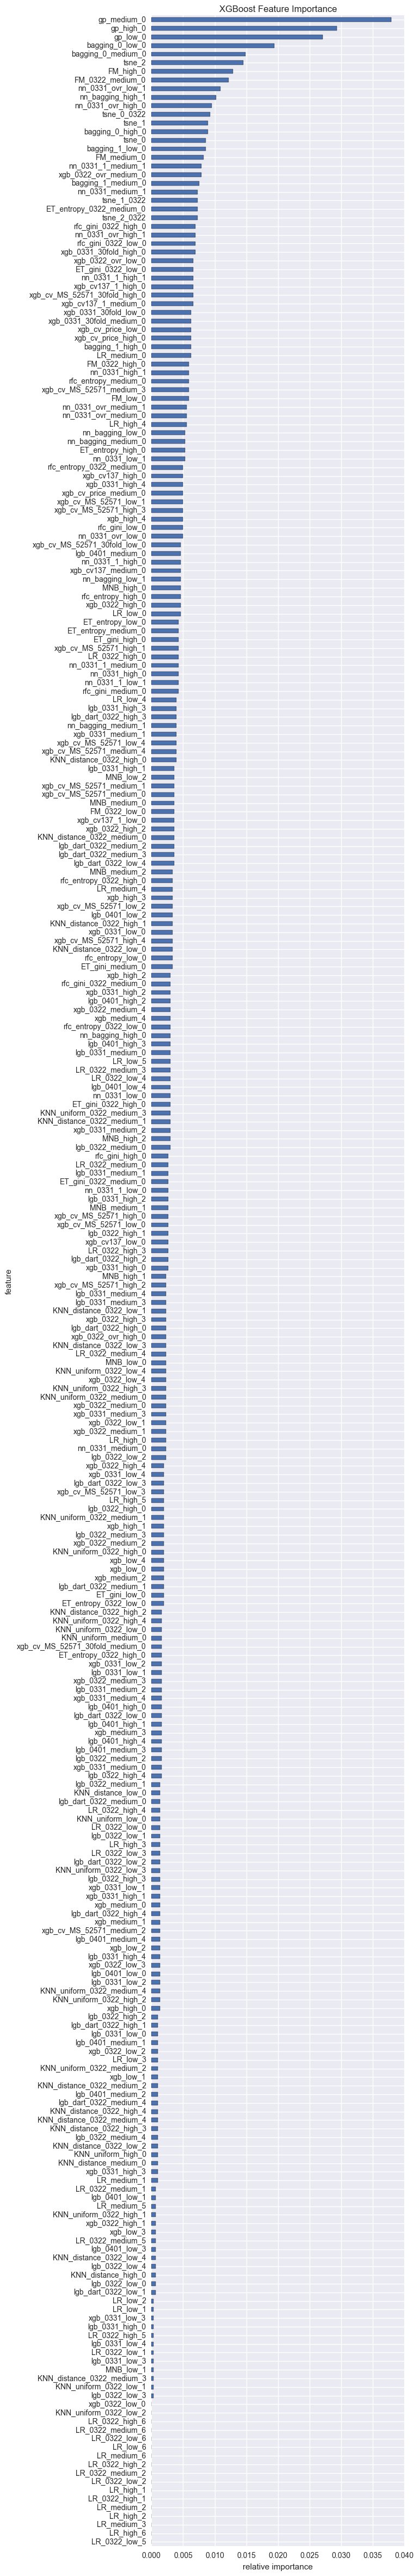

In [38]:
importance = np.vstack((X_train.columns, rgr.feature_importances_))
f_df = pd.DataFrame(importance.T, columns=['feature', 'fscore'])
f_df.fscore = f_df.fscore.astype('float64')
f_df = f_df.sort_values(by = 'fscore',ascending = True)
f_df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 60))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

In [39]:
no_use = f_df[f_df.fscore < 1e-5].feature.values
feature_to_use = [f for f in train_2nd.columns.values if f not in no_use]

In [40]:
cv_train(train_2nd[feature_to_use],train_y, early_stop = 10,verbose_eval = 1)

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 10 rounds.
[0]	train-mlogloss:0.871985+0.000314747	test-mlogloss:0.878126+0.000651447
[1]	train-mlogloss:0.74015+0.000219355	test-mlogloss:0.751999+0.00105856
[2]	train-mlogloss:0.654937+0.000341287	test-mlogloss:0.671939+0.00124859
[3]	train-mlogloss:0.597049+0.000307087	test-mlogloss:0.61897+0.00128459
[4]	train-mlogloss:0.556142+0.000432283	test-mlogloss:0.58269+0.00147398
[5]	train-mlogloss:0.526574+0.00041339	test-mlogloss:0.55774+0.00155815
[6]	train-mlogloss:0.504944+0.000535878	test-mlogloss:0.540105+0.00173463
[7]	train-mlogloss:0.488512+0.000613553	test-mlogloss:0.527866+0.0018249
[8]	train-mlogloss:0.47587+0.000815465	test-mlogloss:0.518998+0.00202838
[9]	train-mlogloss:0.465592+0.000961361	test-mlogloss:0.512553+0.00193949
[10]	train-mlogloss:0.457373+0.000982357	test-mlogloss:0.507941+0.00205813
[11]	train-mlogloss:0.450867+0.000941606

0.49569299999999999

In [41]:
no_use

array(['LR_0322_low_5', 'LR_high_6', 'LR_medium_3', 'LR_high_2',
       'LR_medium_2', 'LR_0322_high_1', 'LR_high_1', 'LR_0322_low_2',
       'LR_0322_medium_2', 'LR_0322_high_2', 'LR_medium_6', 'LR_low_6',
       'LR_0322_low_6', 'LR_0322_medium_6', 'LR_0322_high_6',
       'KNN_uniform_0322_low_2', 'xgb_0322_low_0'], dtype=object)

In [51]:
train_X = train_2nd#[feature_to_use]
test_X = test_2nd_mean#[feature_to_use]

print train_X.shape
print test_X.shape

(49352, 294)
(74659, 294)


In [52]:
from bayes_opt import BayesianOptimization

In [53]:
best_score = 1000
for x in [3,4,5,6,7,8,9,10]:
    tmp = cv_train(train_X,train_y,max_depth = x)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[50]	train-mlogloss:0.459113+0.00108222	test-mlogloss:0.49258+0.00243583

3 	0.4925796
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[27]	train-mlogloss:0.45779+0.000773991	test-mlogloss:0.492916+0.00209752

4 	0.4929164
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[24]	train-mlogloss:0.438064+0.00101155	test-mlogloss:0.49386+0.00140409

5 	0.49386
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[23]	train-mlogloss:0.408022+0.0

Exception AttributeError: "'DMatrix' object has no attribute 'handle'" in <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000000004AB9FCF8>> ignored


KeyboardInterrupt: 

In [63]:
for x in [1,2]:
    tmp = cv_train(train_X,train_y,max_depth = x)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[226]	train-mlogloss:0.477228+0.000606358	test-mlogloss:0.492687+0.00244866

1 	0.4926868
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
Stopping. Best iteration:
[93]	train-mlogloss:0.46507+0.000474064	test-mlogloss:0.492435+0.0025023

2 	0.4924354


In [64]:
# max_depth = train_param
max_depth = train_param
print max_depth

2


In [65]:
train_param = 1
for x in [2,4,8,12,16,20,24,28,32,40,48,64,80,90,100,110,128]:
   
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[90]	train-mlogloss:0.465819+0.000746243	test-mlogloss:0.492506+0.00219552

2 	0.492506
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[69]	train-mlogloss:0.471595+0.000619584	test-mlogloss:0.492781+0.00226286

4 	0.4927806
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[65]	train-mlogloss:0.47301+0.000630463	test-mlogloss:0.492779+0.00212341

8 	0.4927788
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[72]	train-mlogloss:0.47142

In [66]:
min_child_weight = train_param
print min_child_weight

32


In [67]:
train_param = 1
for x in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = min_child_weight, 
                   colsample_bytree = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[120]	train-mlogloss:0.466721+0.000846343	test-mlogloss:0.49469+0.00228656

0.1 	0.4946896
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[120]	train-mlogloss:0.464107+0.000395747	test-mlogloss:0.493173+0.00198503

0.2 	0.4931734
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[86]	train-mlogloss:0.470232+0.000667817	test-mlogloss:0.4928+0.0019112

0.3 	0.4927996
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[80]	train-mlogloss:0

In [68]:
colsample_bytree = train_param
print colsample_bytree

1


In [69]:
train_param = 1
for x in [0.5,0.6,0.7,0.8,0.9]:
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = min_child_weight, 
                   colsample_bytree = colsample_bytree, subsample = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[60]	train-mlogloss:0.475967+0.000690315	test-mlogloss:0.49383+0.00240698

0.5 	0.4938298
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[64]	train-mlogloss:0.474377+0.000635554	test-mlogloss:0.492754+0.00252301

0.6 	0.4927536
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[87]	train-mlogloss:0.468229+0.000852068	test-mlogloss:0.492724+0.00243385

0.7 	0.492724
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[72]	train-mlogloss:0

In [70]:
subsample = train_param
print subsample

0.9


In [71]:
train_param = 0
for x in [0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]:
    tmp = cv_train(train_X,train_y,max_depth = max_depth,min_child_weight = min_child_weight, 
                   colsample_bytree = colsample_bytree, subsample = subsample, gamma = x,early_stop = 20)
    if  tmp < best_score:
        best_score = tmp
        train_param = x

    print x, '\t', tmp

Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[62]	train-mlogloss:0.474275+0.000557186	test-mlogloss:0.492299+0.0020697

0.3 	0.492299
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[66]	train-mlogloss:0.473206+0.000638411	test-mlogloss:0.492301+0.00204311

0.6 	0.4923008
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[69]	train-mlogloss:0.472442+0.000675815	test-mlogloss:0.492254+0.00217235

0.9 	0.492254
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
Stopping. Best iteration:
[66]	train-mlogloss:0.

In [72]:
gamma = train_param
print gamma

1.8


In [73]:
train_X.shape

(49352, 294)

In [76]:
xgtrain = xgb.DMatrix(train_X, label=train_y) 

def xgb_evaluate(min_child_weight, colsample_bytree, max_depth, subsample, gamma): #
    params = dict()
    params['objective']='multi:softprob'
    params['eval_metric']='mlogloss',
    params['num_class']=3
    params['silent']=1
    params['eta'] = 0.1
    params['verbose_eval'] = True
    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    
    cv_result = xgb.cv(
        params, xgtrain, 
        num_boost_round=10000, nfold=5,
        metrics = 'mlogloss',
        seed=1234,callbacks=[xgb.callback.early_stop(50,verbose=False)]
    )
    
    return -cv_result['test-mlogloss-mean'].values[-1]


xgb_BO = BayesianOptimization(
    xgb_evaluate, 
    {
        'max_depth': (2,4),
        'min_child_weight': (16,48),
        'colsample_bytree': (0.8,1),
        'subsample': (0.8,1),
        'gamma': (0.9,2.4)
    }
)

xgb_BO.maximize(init_points=10, n_iter=40)

Initialization
---------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
    1 | 16m24s |   -0.49183 |             0.9914 |    1.1969 |      2.1986 |            36.3338 |      0.9258 | 
    2 | 16m55s |   -0.49182 |             0.8124 |    1.9320 |      3.7520 |            47.9960 |      0.9033 | 
    3 | 11m54s |   -0.49163 |             0.8130 |    1.4545 |      2.6526 |            33.0271 |      0.8806 | 
    4 | 16m46s |   -0.49153 |             0.8768 |    2.0459 |      2.7789 |            47.3295 |      0.8543 | 
    5 | 16m13s |   -0.49196 |             0.9509 |    1.9314 |      3.0433 |            45.0780 |      0.9817 | 
    6 | 13m34s |   -0.49166 |             0.8455 |    1.0488 |      2.7739 |            30.7783 |      0.9229 | 
    7 | 17m36s |   -0.49187 |             0.9904 |    1.3910 |      3.0569 |      

D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.89418767e-05]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00172783]), 'nit': 6, 'funcalls': 80}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
---------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -7.15664632e-05]), 'nit': 6, 'funcalls': 50}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0006711]), 'nit': 5, 'funcalls': 60}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.50231208e-05]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


   11 | 15m38s |   -0.49168 |             0.8858 |    2.2759 |      2.5633 |            16.6969 |      0.8808 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00017524]), 'nit': 8, 'funcalls': 63}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  6.89178951e-05]), 'nit': 7, 'funcalls': 61}
  " state: %s" % convergence_dict)


   12 | 16m05s |   -0.49179 |             0.8447 |    1.6927 |      2.4600 |            47.5825 |      0.8774 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -5.07194563e-05]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00041408]), 'nit': 6, 'funcalls': 56}
  " state: %s" % convergence_dict)


   13 | 15m11s |   -0.49159 |             0.9379 |    1.0405 |      2.8425 |            30.2028 |      0.8000 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.38594627e-05]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)


   14 | 15m18s |   -0.49178 |             0.8095 |    2.0158 |      2.0670 |            31.3685 |      0.9266 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  6.17602927e-05]), 'nit': 6, 'funcalls': 49}
  " state: %s" % convergence_dict)


   15 | 18m31s |   -0.49149 |             0.9966 |    1.6190 |      3.7291 |            20.7907 |      0.8379 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0011223]), 'nit': 5, 'funcalls': 48}
  " state: %s" % convergence_dict)


   16 | 17m22s |   -0.49151 |             0.8371 |    1.3606 |      2.3677 |            21.7594 |      0.8076 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.90962668e-05]), 'nit': 9, 'funcalls': 70}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -8.91325762e-05]), 'nit': 5, 'funcalls': 48}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -6.50860238e-05]), 'nit': 6, 'funcalls': 67}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated ab

   17 | 15m34s |   -0.49177 |             0.9995 |    1.0775 |      2.6689 |            16.7071 |      0.9289 | 
   18 | 17m30s |   -0.49112 |             0.9258 |    2.0838 |      3.2072 |            20.5565 |      0.8371 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.47923487e-05]), 'nit': 8, 'funcalls': 55}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.22861597e-05]), 'nit': 6, 'funcalls': 51}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.17079651e-05]), 'nit': 7, 'funcalls': 54}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated ab

   19 | 14m15s |   -0.49162 |             0.9952 |    2.3852 |      2.9881 |            20.4830 |      0.8000 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00189771]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00064484]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00054902]), 'nit': 6, 'funcalls': 56}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with t

   20 | 18m06s |   -0.49162 |             0.8316 |    1.8137 |      3.5585 |            16.8950 |      0.8184 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00035611]), 'nit': 2, 'funcalls': 48}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.39588150e-05]), 'nit': 4, 'funcalls': 52}
  " state: %s" % convergence_dict)


   21 | 13m44s |   -0.49168 |             0.8267 |    1.3129 |      3.7427 |            28.0647 |      0.8033 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00170679]), 'nit': 5, 'funcalls': 53}
  " state: %s" % convergence_dict)


   22 | 18m11s |   -0.49166 |             0.8493 |    1.1835 |      3.8591 |            20.4758 |      0.9932 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00111638]), 'nit': 6, 'funcalls': 57}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00012903]), 'nit': 3, 'funcalls': 45}
  " state: %s" % convergence_dict)


   23 | 13m49s |   -0.49152 |             0.8236 |    1.8825 |      3.7818 |            37.5560 |      0.8066 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00014403]), 'nit': 7, 'funcalls': 55}
  " state: %s" % convergence_dict)


   24 | 12m31s |   -0.49174 |             0.8643 |    1.1293 |      3.3228 |            44.6982 |      0.8057 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.89905181e-05]), 'nit': 5, 'funcalls': 66}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00131904]), 'nit': 6, 'funcalls': 51}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.000689]), 'nit': 5, 'funcalls': 53}
  " state: %s" % convergence_dict)


   25 | 14m47s |   -0.49140 |             0.8494 |    2.1323 |      3.8512 |            22.6331 |      0.8470 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00090034]), 'nit': 3, 'funcalls': 51}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00015732]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)


   26 | 12m43s |   -0.49166 |             0.9007 |    2.1182 |      2.5000 |            40.2282 |      0.8296 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00042547]), 'nit': 3, 'funcalls': 49}
  " state: %s" % convergence_dict)


   27 | 15m59s |   -0.49143 |             0.8368 |    2.3769 |      3.3183 |            19.9739 |      0.8882 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  7.57713897e-05]), 'nit': 3, 'funcalls': 50}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.44790728e-05]), 'nit': 7, 'funcalls': 55}
  " state: %s" % convergence_dict)


   28 | 12m33s |   -0.49155 |             0.8227 |    1.2852 |      3.8664 |            35.5948 |      0.8014 | 
   29 | 13m15s |   -0.49171 |             0.8422 |    1.8607 |      2.8011 |            21.0979 |      0.9331 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00043983]), 'nit': 3, 'funcalls': 50}
  " state: %s" % convergence_dict)


   30 | 12m44s |   -0.49153 |             0.8555 |    0.9397 |      3.3065 |            25.4645 |      0.8234 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00112671]), 'nit': 4, 'funcalls': 49}
  " state: %s" % convergence_dict)


   31 | 11m50s |   -0.49158 |             0.8000 |    2.0477 |      2.3352 |            16.4688 |      0.8000 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00026774]), 'nit': 5, 'funcalls': 65}
  " state: %s" % convergence_dict)


   32 | 16m46s |   -0.49146 |             0.9364 |    0.9554 |      3.0720 |            19.1234 |      0.9559 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -4.52876557e-05]), 'nit': 5, 'funcalls': 49}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00049049]), 'nit': 7, 'funcalls': 57}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00134138]), 'nit': 3, 'funcalls': 50}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally w

   33 | 15m25s |   -0.49112 |             0.9258 |    2.0838 |      3.2072 |            20.5565 |      0.8371 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -9.65217296e-05]), 'nit': 3, 'funcalls': 49}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00643877]), 'nit': 3, 'funcalls': 62}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00015065]), 'nit': 4, 'funcalls': 53}
  " state: %s" % convergence_dict)


   34 | 15m56s |   -0.49112 |             0.9258 |    2.0838 |      3.2072 |            20.5565 |      0.8371 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  8.26444011e-05]), 'nit': 6, 'funcalls': 71}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00137984]), 'nit': 7, 'funcalls': 66}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  5.60749322e-05]), 'nit': 5, 'funcalls': 60}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnorma

   35 | 15m43s |   -0.49135 |             0.8524 |    2.3609 |      3.5296 |            19.5464 |      0.8631 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.63820821e-05]), 'nit': 3, 'funcalls': 49}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00672525]), 'nit': 3, 'funcalls': 55}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00143026]), 'nit': 4, 'funcalls': 71}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally w

   36 | 15m10s |   -0.49183 |             0.9700 |    2.1462 |      3.3140 |            45.5649 |      0.9706 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00140337]), 'nit': 3, 'funcalls': 52}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00036093]), 'nit': 4, 'funcalls': 53}
  " state: %s" % convergence_dict)


   37 | 13m52s |   -0.49156 |             0.9906 |    1.9325 |      2.5017 |            18.1692 |      0.8228 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00122876]), 'nit': 9, 'funcalls': 110}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00015716]), 'nit': 7, 'funcalls': 99}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00058434]), 'nit': 3, 'funcalls': 57}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with 

   38 | 15m46s |   -0.49130 |             0.8368 |    2.3769 |      3.3183 |            19.9739 |      0.8882 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00226353]), 'nit': 3, 'funcalls': 49}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0016532]), 'nit': 7, 'funcalls': 89}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.01958044]), 'nit': 8, 'funcalls': 84}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with th

   39 | 15m36s |   -0.49175 |             0.9195 |    1.9927 |      2.0352 |            43.3822 |      0.8361 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00010516]), 'nit': 7, 'funcalls': 54}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00010266]), 'nit': 6, 'funcalls': 71}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.04064015]), 'nit': 4, 'funcalls': 60}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with t

   40 | 12m50s |   -0.49162 |             0.8393 |    1.3204 |      3.1869 |            37.5663 |      0.8317 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00131959]), 'nit': 4, 'funcalls': 85}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00043422]), 'nit': 7, 'funcalls': 92}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.14738941e-05]), 'nit': 5, 'funcalls': 66}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally w

   41 | 15m25s |   -0.49154 |             0.8316 |    1.8137 |      3.5585 |            16.8950 |      0.8184 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00323744]), 'nit': 5, 'funcalls': 64}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00113753]), 'nit': 8, 'funcalls': 83}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0560672]), 'nit': 5, 'funcalls': 65}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with th

   42 | 15m29s |   -0.49161 |             0.8097 |    1.4512 |      3.8694 |            35.9917 |      0.9185 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00015034]), 'nit': 6, 'funcalls': 100}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.64868140e-05]), 'nit': 7, 'funcalls': 78}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00301129]), 'nit': 4, 'funcalls': 90}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally 

   43 | 17m18s |   -0.49149 |             0.8926 |    1.9312 |      3.5225 |            20.5121 |      0.9860 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0007916]), 'nit': 6, 'funcalls': 68}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  5.33895145e-05]), 'nit': 7, 'funcalls': 77}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.09017293]), 'nit': 6, 'funcalls': 104}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally w

   44 | 14m35s |   -0.49140 |             0.8494 |    2.1323 |      3.8512 |            22.6331 |      0.8470 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00081623]), 'nit': 5, 'funcalls': 58}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01548132]), 'nit': 9, 'funcalls': 125}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.1242418]), 'nit': 2, 'funcalls': 49}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with t

   45 | 15m57s |   -0.49121 |             0.9258 |    2.0838 |      3.2072 |            20.5565 |      0.8371 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00019373]), 'nit': 7, 'funcalls': 84}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00077613]), 'nit': 5, 'funcalls': 53}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00023921]), 'nit': 6, 'funcalls': 65}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with t

   46 | 15m03s |   -0.49171 |             0.8632 |    1.0961 |      3.0348 |            34.3571 |      0.8798 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.05028108]), 'nit': 4, 'funcalls': 78}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00040217]), 'nit': 6, 'funcalls': 78}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0002041]), 'nit': 5, 'funcalls': 47}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with th

   47 | 16m00s |   -0.49112 |             0.9258 |    2.0838 |      3.2072 |            20.5565 |      0.8371 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.14750769]), 'nit': 3, 'funcalls': 75}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.67976241e-05]), 'nit': 7, 'funcalls': 86}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00074764]), 'nit': 11, 'funcalls': 98}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally 

   48 | 15m58s |   -0.49160 |             0.9488 |    1.0071 |      2.5206 |            45.2229 |      0.9001 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00443959]), 'nit': 3, 'funcalls': 49}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00018668]), 'nit': 5, 'funcalls': 92}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  7.24792480e-05]), 'nit': 6, 'funcalls': 66}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally w

   49 | 15m20s |   -0.49176 |             0.8447 |    1.6927 |      2.4600 |            47.5825 |      0.8774 | 


D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00043085]), 'nit': 5, 'funcalls': 65}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00025862]), 'nit': 6, 'funcalls': 74}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00159979]), 'nit': 3, 'funcalls': 61}
  " state: %s" % convergence_dict)
D:\python\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with t

   50 | 16m41s |   -0.49149 |             0.9966 |    1.6190 |      3.7291 |            20.7907 |      0.8379 | 


In [77]:
xgb_bo_scores = pd.DataFrame([[s[0]['max_depth'],
                               s[0]['min_child_weight'],
                               s[0]['colsample_bytree'],
                               s[0]['subsample'],
                               s[0]['gamma'],
                               s[1]] for s in zip(xgb_BO.res['all']['params'],xgb_BO.res['all']['values'])],
                            columns = ['max_depth',
                                       'min_child_weight',
                                       'colsample_bytree',
                                       'subsample',
                                       'gamma',
                                       'score'])
xgb_bo_scores=xgb_bo_scores.sort_values('score',ascending=False)
xgb_bo_scores.head(10)

,max_depth,min_child_weight,colsample_bytree,subsample,gamma,score
36,3.207182,20.556477,0.925784,0.837063,2.083839,-0.491124
22,3.207182,20.556483,0.925784,0.837063,2.083839,-0.491124
7,3.207181,20.556476,0.925784,0.837063,2.083839,-0.491124
23,3.207181,20.556477,0.925784,0.837063,2.083839,-0.491124
34,3.207182,20.556481,0.925783,0.837062,2.083839,-0.491207
27,3.318345,19.973909,0.836811,0.888199,2.376874,-0.491301
24,3.529572,19.546420,0.852447,0.863086,2.360895,-0.491349
14,3.851169,22.633052,0.849421,0.846999,2.132305,-0.491400
33,3.851168,22.633065,0.849421,0.846999,2.132305,-0.491401
16,3.318345,19.973920,0.836811,0.888199,2.376875,-0.491429


In [89]:
def xgb_blend(estimators, train_x, train_y, test_x, fold, early_stopping_rounds=0,randomseed=1234):
    fold_start = time.time() 
    N_params = len(estimators)
#     print ("Blend %d estimators for %d folds" % (N_params, fold))
    skf = KFold(n_splits=fold,shuffle=True,random_state=randomseed)
    N_class = len(set(train_y))
        
    train_blend_x = np.zeros((train_x.shape[0], N_class*N_params))
    test_blend_x_mean = np.zeros((test_x.shape[0], N_class*N_params))
    test_blend_x_gmean = np.zeros((test_x.shape[0], N_class*N_params))
    scores = np.zeros ((fold,N_params))
    best_rounds = np.zeros ((fold, N_params))
    
    for j, est in enumerate(estimators):
        est.set_params(objective = 'multi:softprob')
        est.set_params(silent = False)
        est.set_params(learning_rate = 0.02)
        est.set_params(n_estimators=100000)
        
#         print ("Model %d: %s" %(j+1, est))

        test_blend_x_j = np.zeros((test_x.shape[0], N_class*fold))
    
        for i, (train_index, val_index) in enumerate(skf.split(train_x)):
#             print ("Model %d fold %d" %(j+1,i+1))
            
            train_x_fold = train_x.iloc[train_index]
            train_y_fold = train_y[train_index]
            val_x_fold = train_x.iloc[val_index]
            val_y_fold = train_y[val_index]      

            est.fit(train_x_fold,train_y_fold,
                    eval_set = [(val_x_fold, val_y_fold)],
                    eval_metric = 'mlogloss',
                    early_stopping_rounds=early_stopping_rounds,
                    verbose=False)
            best_round=est.best_iteration
            best_rounds[i,j]=best_round
#             print ("best round %d" % (best_round))
            val_y_predict_fold = est.predict_proba(val_x_fold,ntree_limit=best_round)
            score = log_loss(val_y_fold, val_y_predict_fold)
#             print "Score: ", score
            scores[i,j]=score
            train_blend_x[val_index, (j*N_class):(j+1)*N_class] = val_y_predict_fold
            
            test_blend_x_j[:,(i*N_class):(i+1)*N_class] = est.predict_proba(test_x,ntree_limit=best_round)
#             print ("Model %d fold %d fitting finished in %0.3fm" % (j+1,i+1, )
            
        test_blend_x_mean[:,(j*N_class):(j+1)*N_class] = \
                np.stack([test_blend_x_j[:,range(0,N_class*fold,N_class)].mean(1),
                          test_blend_x_j[:,range(1,N_class*fold,N_class)].mean(1),
                          test_blend_x_j[:,range(2,N_class*fold,N_class)].mean(1)]).T
        
#         test_blend_x_gmean[:,(j*N_class):(j+1)*N_class] = \
#                 np.stack([gmean(test_blend_x_j[:,range(0,N_class*fold,N_class)], axis=1),
#                           gmean(test_blend_x_j[:,range(1,N_class*fold,N_class)], axis=1),
#                           gmean(test_blend_x_j[:,range(2,N_class*fold,N_class)], axis=1)]).T
            
#         print ("Score for model %d is %f" % (j+1,np.mean(scores[:,j])))
    print "Score models is %f fitting finished in %0.3fm" % (np.mean(scores),(time.time() - fold_start)/60)
    return (train_blend_x, test_blend_x_mean, test_blend_x_gmean, scores,best_rounds)


In [93]:
train_total = np.zeros((train_2nd.shape[0], 3))
test_total = np.zeros((test_2nd_mean.shape[0], 3))
name_train_blend = '../tmp/train_2ndxgb.csv'
name_test_blend = '../tmp/test_2ndxgb.csv'
score_total = 0
count = 10
print 'Starting ..........'
for n in range(count):
    randomseed = n
    estimators = [
                 xgb.XGBClassifier(max_depth = 3,
                                  min_child_weight = 20,
                                  colsample_bytree = 0.925784,
                                  subsample = 0.837063,
                                  gamma = 2.083839),  
                 ]
# 	max_depth 	min_child_weight 	colsample_bytree 	subsample 	gamma 	score
# 36 	3.207182 	20.556477 	 	 	0.925784 	 	 	0.837063 	2.083839 	-0.491124

    (train_blend_x_xgb,
     test_blend_x_xgb_mean,
     test_blend_x_xgb_gmean,
     blend_scores_xgb,
     best_rounds_xgb) = xgb_blend(estimators,
                                  train_X,train_y,
                                  test_X,
                                  10,
                                  500,randomseed)
    train_total += train_blend_x_xgb
    test_total += test_blend_x_xgb_mean
    score_total += np.mean(blend_scores_xgb)

    np.savetxt(name_train_blend,train_total, delimiter=",")
    np.savetxt(name_test_blend,test_total, delimiter=",")
    
train_total = train_total / count
test_total = test_total / count
score_total = score_total / count

Starting ..........
Score models is 0.490386 fitting finished in 245.432m
Score models is 0.490657 fitting finished in 238.721m
Score models is 0.490514 fitting finished in 247.325m
Score models is 0.490608 fitting finished in 264.994m
Score models is 0.490655 fitting finished in 267.714m
Score models is 0.490413 fitting finished in 246.210m
Score models is 0.490622 fitting finished in 225.054m
Score models is 0.490667 fitting finished in 226.635m
Score models is 0.490776 fitting finished in 221.860m
Score models is 0.490551 fitting finished in 226.808m


In [94]:
now = datetime.now()

name_train_blend = '../blend/train_blend_2ndXGB_BM_10bagging_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'
name_test_blend_mean = '../blend/test_blend_2ndXGB_BM_10bagging_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'


print score_total
# print (np.mean(best_rounds_RFC,axis=0))
np.savetxt(name_train_blend,train_total, delimiter=",")
np.savetxt(name_test_blend_mean,test_total, delimiter=",")

0.490584906828


In [95]:
train_total = np.zeros((train_2nd.shape[0], 3))
test_total = np.zeros((test_2nd_mean.shape[0], 3))
name_train_blend = '../tmp/train_2ndxgb.csv'
name_test_blend = '../tmp/test_2ndxgb.csv'
score_total = 0
count = 10
print 'Starting ..........'
for n in range(count):
    randomseed = n + 10
    estimators = [
                 xgb.XGBClassifier(max_depth = 3,
                                  min_child_weight = 20,
                                  colsample_bytree = 0.925784,
                                  subsample = 0.837063,
                                  gamma = 2.083839),  
                 ]
# 	max_depth 	min_child_weight 	colsample_bytree 	subsample 	gamma 	score
# 36 	3.207182 	20.556477 	 	 	0.925784 	 	 	0.837063 	2.083839 	-0.491124

    (train_blend_x_xgb,
     test_blend_x_xgb_mean,
     test_blend_x_xgb_gmean,
     blend_scores_xgb,
     best_rounds_xgb) = xgb_blend(estimators,
                                  train_X,train_y,
                                  test_X,
                                  10,
                                  500,randomseed)
    train_total += train_blend_x_xgb
    test_total += test_blend_x_xgb_mean
    score_total += np.mean(blend_scores_xgb)

    np.savetxt(name_train_blend,train_total, delimiter=",")
    np.savetxt(name_test_blend,test_total, delimiter=",")
    
train_total = train_total / count
test_total = test_total / count
score_total = score_total / count

Starting ..........
Score models is 0.490806 fitting finished in 211.149m
Score models is 0.490558 fitting finished in 245.133m
Score models is 0.490512 fitting finished in 248.124m
Score models is 0.490371 fitting finished in 245.884m
Score models is 0.490167 fitting finished in 247.338m
Score models is 0.490554 fitting finished in 254.138m
Score models is 0.490872 fitting finished in 242.193m
Score models is 0.490950 fitting finished in 332.699m
Score models is 0.490780 fitting finished in 294.739m
Score models is 0.490402 fitting finished in 238.699m


In [96]:
now = datetime.now()

name_train_blend = '../blend/train_blend_2ndXGB_BM_10bagging_1_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'
name_test_blend_mean = '../blend/test_blend_2ndXGB_BM_10bagging_1_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'


print score_total
# print (np.mean(best_rounds_RFC,axis=0))
np.savetxt(name_train_blend,train_total, delimiter=",")
np.savetxt(name_test_blend_mean,test_total, delimiter=",")

0.490597254686


In [97]:
# now = datetime.now()
data_path = "../input/"
test_X_0322 = pd.read_csv(data_path + 'test_BM_MB_add03052240.csv')

sub_name = '../output/sub_2ndXGB_BM_10bagging_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'

out_df = pd.DataFrame(test_total[:,:3])
out_df.columns = ["low", "medium", "high"]
out_df["listing_id"] = test_X_0322.listing_id.values
out_df.to_csv(sub_name, index=False)